In [1]:
import glob
import pandas as pd
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# directory= "/data/sxs7285/Porjects_code/sector_activity/data/data_csv2"
# csv_files_path  = glob.glob(os.path.join(directory,"linkedin_split_*_summarized.csv"))

# data_frames = []

# all_dataset = pd.DataFrame()

# for csv_path in csv_files_path:

#     all_dataset = pd.concat([all_dataset, pd.read_csv(csv_path)], ignore_index=True)

# Save the merged DataFrame to a new CSV file
# output_path = os.path.join(directory, "Linekdin_dataset_Final.csv")
# all_dataset.to_csv(output_path, index=False)


# class_column = 'content_word_count'
# linkedin[class_column] =linkedin.apply(lambda x: len(x['content'].split()),axis = 1) 


# class_column = 'summary_word_count'
# linkedin[class_column] =linkedin.apply(lambda x: len(x['extractive_summary'].split()),axis = 1) 

In [3]:
import pandas as pd

directory= "/data/sxs7285/Porjects_code/sector_activity/data/data_csv2/"

linkedin = pd.read_csv(os.path.join(directory, "Linekdin_dataset_Finale.csv"))

In [ ]:
# linkedin = linkedin.sample(700)

In [ ]:
linkedin

,content,label,label_coarse,pp_url,extractive_summary,content_word_count,summary_word_count
0,Site Overview:\n\n\n[PAGE]\nTitle: About Us - ...,legal services,"government, defense & legal",https://centrixlegal.com/privacy-policy/,Site Overview: Title: About Us - Centrix Legal...,197,96
1,Site Overview:\n\n\n[PAGE]\nTitle: MISA Metal ...,mining & metals,"civil, mechanical & electrical",https://www.misametalfab.com/privacy-policy,Our extensive experience and capabilities incl...,2125,120
2,Site Overview:\n\n\n[PAGE]\nTitle: FaithAction...,civic & social organization,"government, defense & legal",https://www.lifelineprojects.co.uk/privacy/,Title: SW!TCH Training - LifeLine Projects Con...,5128,152
3,Site Overview:\n\n\n[PAGE]\nTitle: Bunk Beds i...,retail,consumer & supply chain,https://www.delsolfurniture.com/legal/privacyp...,Del Sol is not responsible for injury or damag...,51666,836
4,Site Overview:\n\n\n[PAGE]\nTitle: Our Partner...,research,education,https://www.tuftsctsi.org/privacy-policy/,The CTRC services are available to research te...,39854,744
...,...,...,...,...,...,...,...
229939,Site Overview:\n\n\n[PAGE]\nTitle: Category 1A...,real estate,"finance, marketing & human resources",https://stsurvey.com/privacy-policy,What is the role of a land surveyor in the pla...,14011,129
229940,Site Overview:\n\n\n[PAGE]\nTitle: \nDecision ...,computer software,information technology & electronics,https://www.dezide.com/privacy-policy/,"For 20 years, we have been capturing expert tr...",11952,235
229941,Site Overview:\n\n\n[PAGE]\nTitle: CNC Machini...,machinery,"civil, mechanical & electrical",https://rtprime.com/privacy/,Title: Our Guarantee – RTPrime Content: OUR GU...,4047,169
229942,Site Overview:\n\n\n[PAGE]\nTitle: LEE AUSTIN ...,design,consumer & supply chain,https://www.leeaustindesign.com/privacy-and-ot...,Site Overview: Title: LEE AUSTIN DESIGN - Besp...,176,105


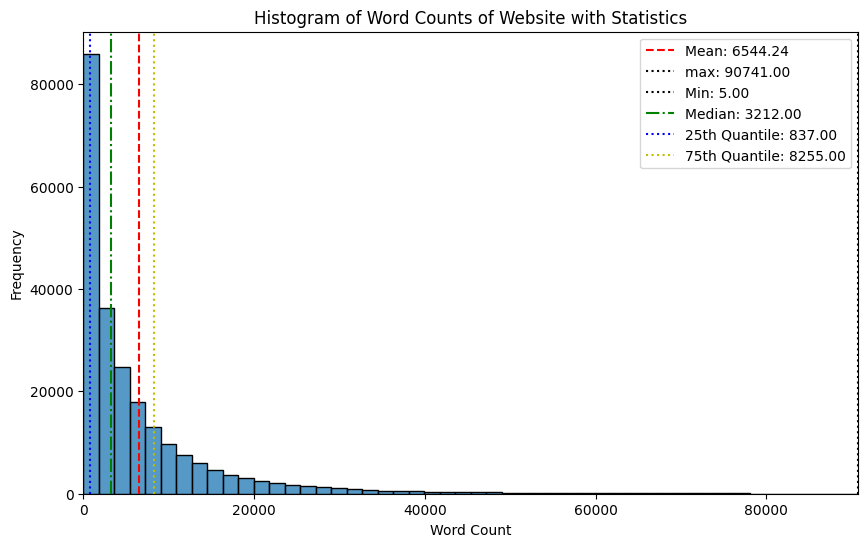

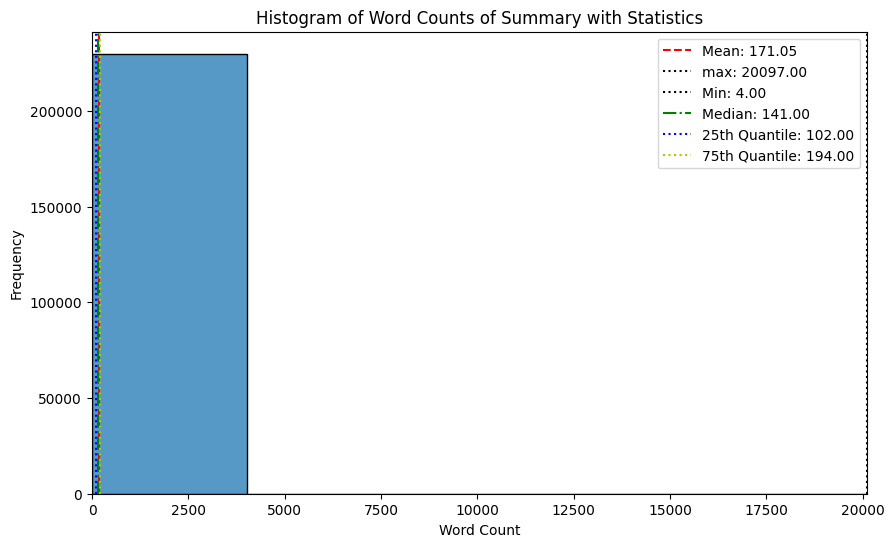

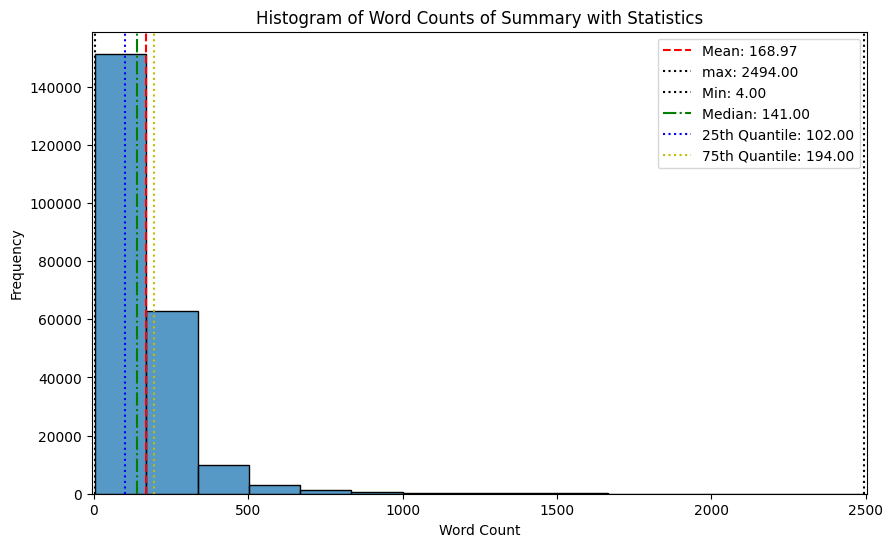

In [ ]:
    
def plot_word_count(data,word_count, bin = 10, text = "Website Content"):

    mean = data[word_count].mean()
    median = data[word_count].median()
    quantiles = data[word_count].quantile([0.25,0.5,0.75])

    max = data[word_count].max()
    min = data[word_count].min()


    plt.figure(figsize=(10, 6))
    sns.histplot(data[word_count], bins = bin,kde=False)

    # Add vertical lines for mean, median, and quantiles
    plt.axvline(mean, color='r', linestyle='--', label=f'Mean: {mean:.2f}')
    
    plt.axvline(max, color='black', linestyle='dotted', label=f'max: {max:.2f}')
    plt.axvline(min, color='black', linestyle='dotted', label=f'Min: {min:.2f}')

    plt.axvline(median, color='g', linestyle='-.', label=f'Median: {median:.2f}')
    plt.axvline(quantiles[0.25], color='b', linestyle=':', label=f'25th Quantile: {quantiles[0.25]:.2f}')
    plt.axvline(quantiles[0.75], color='y', linestyle=':', label=f'75th Quantile: {quantiles[0.75]:.2f}')
    plt.xlim(data[word_count].min() - 10, data[word_count].max() + 10)

    # Add labels and legend
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')
    # plt.title(f'Histogram of Word Counts of {text} with Statistics')
    plt.legend()

    # Show plot
    plt.show()

plot_word_count(linkedin,"content_word_count",50)
plot_word_count(linkedin,"summary_word_count", 5, "Summary of Website Content")
plot_word_count(linkedin[linkedin['summary_word_count']<2500],"summary_word_count", 15, "Summary")

In [7]:
linkedin['summary_word_count'].max()

20097

In [8]:
linkedin['summary_word_count'].min()

4

In [9]:
def cumalative_freq(data,word_count):
    quantiles = data[word_count].quantile([0.15,0.25,0.5,0.75])
    total_samples = len(data[word_count])
    print(f"Total samples: {total_samples}")

    for quantile in quantiles.index:
        count_above = (data[word_count] > quantiles[quantile]).sum()
        print(f"Number of samples above the {quantile*100}% quantile ({quantiles[quantile]}): {count_above}")


cumalative_freq(linkedin,"content_word_count")
cumalative_freq(linkedin,"summary_word_count")


Total samples: 229944
Number of samples above the 15.0% quantile (336.0): 195428
Number of samples above the 25.0% quantile (837.0): 172430
Number of samples above the 50.0% quantile (3212.0): 114965
Number of samples above the 75.0% quantile (8255.0): 57476
Total samples: 229944
Number of samples above the 15.0% quantile (82.0): 194758
Number of samples above the 25.0% quantile (102.0): 171604
Number of samples above the 50.0% quantile (141.0): 113892
Number of samples above the 75.0% quantile (194.0): 57156


In [10]:
import numpy as np
import cleanlab
from cleanlab import Datalab
from cleanlab.classification import CleanLearning
from cleanlab.benchmarking import noise_generation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from numpy.random import multivariate_normal
from matplotlib import pyplot as plt

In [11]:
import pandas as pd

def filter_by_word_count_quantile(df, word_count_column, quantile_threshold):
    """
    Filters out samples from the DataFrame with word counts less than the specified quantile threshold.

    Parameters:
    - df: pandas DataFrame
    - word_count_column: str, name of the column containing word counts
    - quantile_threshold: float, quantile threshold (between 0 and 1)

    Returns:
    - filtered_df: pandas DataFrame, DataFrame with samples having word counts >= quantile threshold
    """
    # Calculate the quantile value
    quantile_value = df[word_count_column].quantile(quantile_threshold)
    
    # Filter the DataFrame
    filtered_df = df[df[word_count_column] >= quantile_value]
    
    return filtered_df

# Example usage:
# Assuming `linkedin` is your DataFrame with a column 'word_count'
# Filter out samples with word count less than the 0.25 quantile
filtered_linkedin = filter_by_word_count_quantile(linkedin, 'content_word_count', 0.15)

# Print the sizes of the original and filtered DataFrames
print(f"Original dataset size: {len(linkedin)}")
print(f"Filtered dataset size: {len(filtered_linkedin)}")


Original dataset size: 229944
Filtered dataset size: 195495


In [27]:
filtered_linkedin

,content,label,label_coarse,pp_url,extractive_summary,content_word_count,summary_word_count
1,Site Overview:\n\n\n[PAGE]\nTitle: MISA Metal ...,mining & metals,"civil, mechanical & electrical",https://www.misametalfab.com/privacy-policy,Our extensive experience and capabilities incl...,2125,120
2,Site Overview:\n\n\n[PAGE]\nTitle: FaithAction...,civic & social organization,"government, defense & legal",https://www.lifelineprojects.co.uk/privacy/,Title: SW!TCH Training - LifeLine Projects Con...,5128,152
3,Site Overview:\n\n\n[PAGE]\nTitle: Bunk Beds i...,retail,consumer & supply chain,https://www.delsolfurniture.com/legal/privacyp...,Del Sol is not responsible for injury or damag...,51666,836
4,Site Overview:\n\n\n[PAGE]\nTitle: Our Partner...,research,education,https://www.tuftsctsi.org/privacy-policy/,The CTRC services are available to research te...,39854,744
5,Site Overview:\n\n\n[PAGE]\nTitle: 140-400 cel...,renewables & environment,"civil, mechanical & electrical",https://www.solarinnova.net/en/home/privacy-po...,Site Overview: Our solar panels is ideal for a...,364,94
...,...,...,...,...,...,...,...
229938,Site Overview:\n\n\n[PAGE]\nTitle: Sponsorship...,food & beverages,"travel, food & hospitality",https://www.namedsport.com/en/privacy-policy-c...,For any distance or level of competition in tr...,7909,214
229939,Site Overview:\n\n\n[PAGE]\nTitle: Category 1A...,real estate,"finance, marketing & human resources",https://stsurvey.com/privacy-policy,What is the role of a land surveyor in the pla...,14011,129
229940,Site Overview:\n\n\n[PAGE]\nTitle: \nDecision ...,computer software,information technology & electronics,https://www.dezide.com/privacy-policy/,"For 20 years, we have been capturing expert tr...",11952,235
229941,Site Overview:\n\n\n[PAGE]\nTitle: CNC Machini...,machinery,"civil, mechanical & electrical",https://rtprime.com/privacy/,Title: Our Guarantee – RTPrime Content: OUR GU...,4047,169


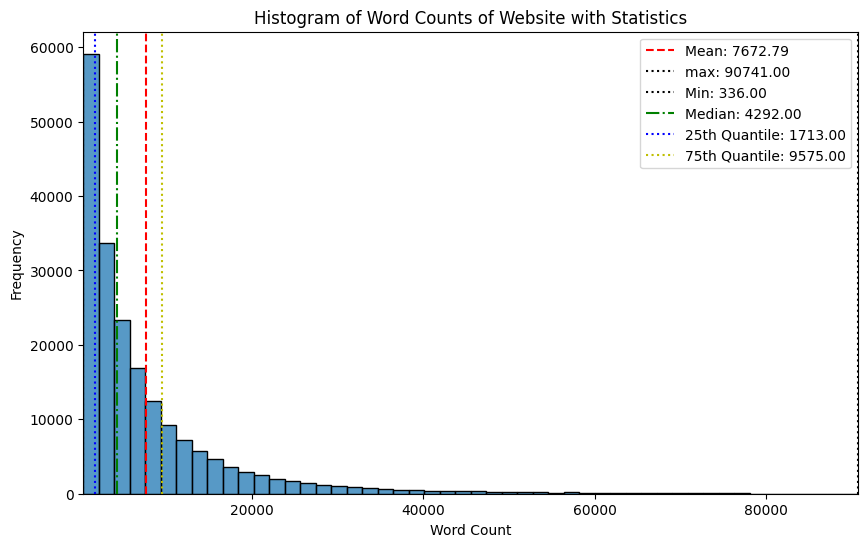

In [29]:
plot_word_count(filtered_linkedin,"content_word_count",50)


In [12]:
# filtered_linkedin = filtered_linkedin.sample(10000)

In [13]:
from sklearn.model_selection import train_test_split

class_column = 'label_coarse'
train_data, test_data = train_test_split(filtered_linkedin, test_size=0.3, random_state=42, stratify=filtered_linkedin[class_column])
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42, stratify=train_data[class_column])


In [14]:
print(f"Training data size: {train_data.shape[0]}")
print(f"Validation data size: {val_data.shape[0]}")
print(f"Test data size: {test_data.shape[0]}")

Training data size: 109476
Validation data size: 27370
Test data size: 58649


In [15]:
train_data

,content,label,label_coarse,pp_url,extractive_summary,content_word_count,summary_word_count
179141,Site Overview:\n\n\n[PAGE]\nTitle: Interpay\nC...,internet,information technology & electronics,https://www.interpayafrica.com/Home/Privacy,Ghanaians in the UK and Canada can now make di...,1208,191
12427,Site Overview:\n\n\n[PAGE]\nTitle: Bookings | ...,accounting,"finance, marketing & human resources",https://bizfacility.com/privacy-policy/,I have done many courses but your courses you ...,2254,105
87869,Site Overview:\n\n\n[PAGE]\nTitle: Hawaii Real...,real estate,"finance, marketing & human resources",https://www.barneshawaii.com/privacy/,Title: Contact Compass Content: Contact Compas...,5560,296
59806,Site Overview:\n\n\n[PAGE]\nTitle: Bhogal Part...,law practice,"government, defense & legal",https://bhogalpartners.co.uk/privacy-policy/,"If you contact us, we can you give you a quote...",9447,347
76758,Site Overview:\n\n\n[PAGE]\nTitle: Capabilitie...,media production,"sports, media & entertainment",https://bnrmediagroup.ca/privacy-policy/,"Title: Capabilities - Creative, Strategy, Vide...",2744,137
...,...,...,...,...,...,...,...
3136,Site Overview:\n\n\n[PAGE]\nTitle: Corporate S...,construction,"civil, mechanical & electrical",https://www.systemair.com.au/privacy-policy,Title: Projects - System Air Pty Ltd t/as SABE...,4123,196
125976,Site Overview:\n\n\n[PAGE]\nTitle: Convention ...,civic & social organization,"government, defense & legal",https://www.lenexa.org/privacy-policy/,66282(913) 735-3635 linda4kansas@gmail.com Dis...,3657,83
121733,Site Overview:\n\n\n[PAGE]\nTitle: HeartShare ...,individual & family services,consumer & supply chain,https://hsvsnyc.org/privacy/,Sessions are structured to help you look at yo...,4627,126
133652,Site Overview:\n\n\n[PAGE]\nTitle: RightDrive ...,automotive,"civil, mechanical & electrical",https://www.rightdrive.ca/privacy-policy/,They are perfect for a JDM import in Canada as...,9563,140


In [16]:
train_data["label_coarse"].value_counts()


label_coarse
finance, marketing & human resources    21465
information technology & electronics    16569
consumer & supply chain                 15137
civil, mechanical & electrical          14257
medical                                  9740
sports, media & entertainment            8852
education                                7418
government, defense & legal              6230
travel, food & hospitality               5758
non-profit                               4050
Name: count, dtype: int64

In [17]:
import torch
import torch.nn as nn

# Toy example inputs
logits = torch.tensor([[1.2, 0.9, 0.3], [0.4, 1.5, 0.7], [0.3, 0.1, 2.0]], requires_grad=True)
targets = torch.tensor([0, 1, 2])

print("Logits:\n", logits)
print("Targets:\n", targets)

# Step 1: Cross-Entropy Loss Calculation
ce_loss_fn = nn.CrossEntropyLoss(reduction='none')
ce_loss = ce_loss_fn(logits, targets)
print("\nStep 1 - Cross-Entropy Loss:\n", ce_loss)

# Step 2: Compute Probability of the True Class
pt = torch.exp(-ce_loss)
print("\nStep 2 - Probability of True Class (pt):\n", pt)

# Step 3: Calculate Focal Loss
gamma = 2
focal_loss = ((1 - pt) ** gamma) * ce_loss
print("\nStep 3 - Focal Loss:\n", focal_loss)

# Step 4: Apply Alpha (Class Balancing Factor)
alpha = torch.tensor([0.25, 0.25, 0.25])
alpha_t = alpha.gather(0, targets)
focal_loss = alpha_t * focal_loss
print("\nStep 4 - Focal Loss with Alpha:\n", focal_loss)

# Step 5: Reduction (Mean or Sum)
reduction = 'mean'
if reduction == 'mean':
    focal_loss = focal_loss.mean()
elif reduction == 'sum':
    focal_loss = focal_loss.sum()
print("\nStep 5 - Final Focal Loss:\n", focal_loss)


Logits:
 tensor([[1.2000, 0.9000, 0.3000],
        [0.4000, 1.5000, 0.7000],
        [0.3000, 0.1000, 2.0000]], requires_grad=True)
Targets:
 tensor([0, 1, 2])

Step 1 - Cross-Entropy Loss:
 tensor([0.7643, 0.5778, 0.2869], grad_fn=<NllLossBackward0>)

Step 2 - Probability of True Class (pt):
 tensor([0.4657, 0.5611, 0.7506], grad_fn=<ExpBackward0>)

Step 3 - Focal Loss:
 tensor([0.2182, 0.1113, 0.0178], grad_fn=<MulBackward0>)

Step 4 - Focal Loss with Alpha:
 tensor([0.0545, 0.0278, 0.0045], grad_fn=<MulBackward0>)

Step 5 - Final Focal Loss:
 tensor(0.0289, grad_fn=<MeanBackward0>)


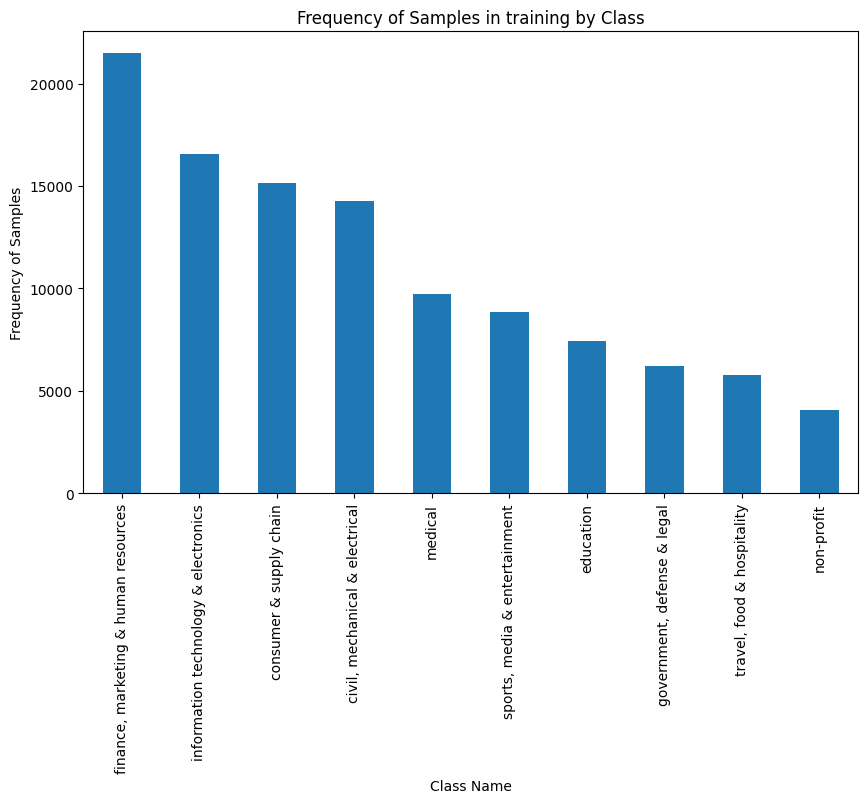

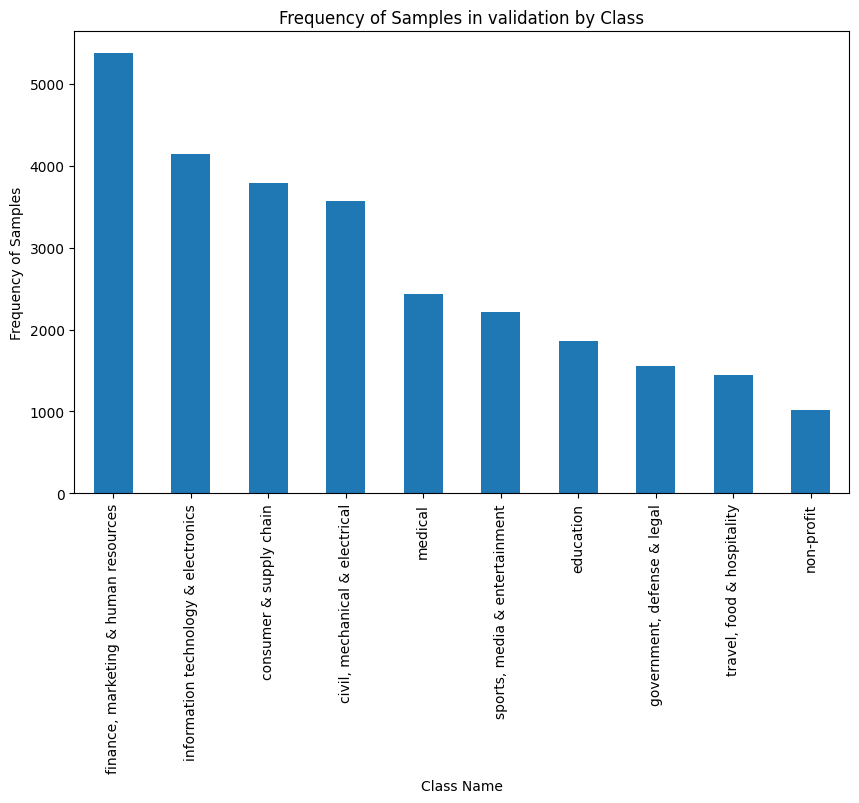

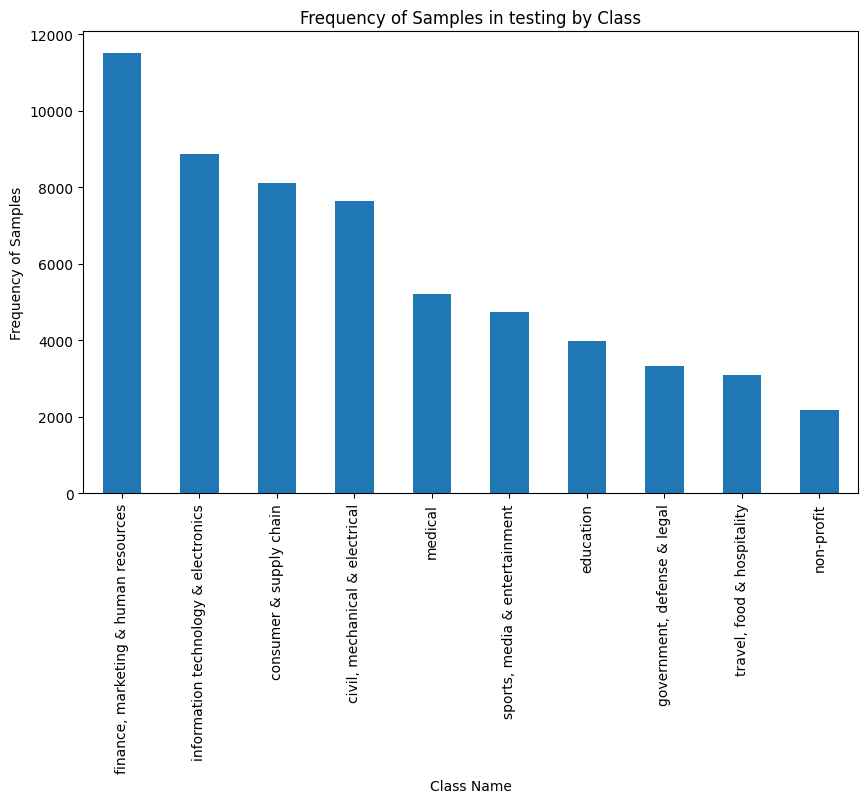

In [18]:

def plot_clss_dist(df, cls, text = "Not Set"):
    # Calculate the frequency of each class
    class_counts = df[cls].value_counts()

    # Plot the frequency of each class
    plt.figure(figsize=(10, 6))
    class_counts.plot(kind='bar')
    plt.xlabel('Class Name')
    plt.ylabel('Frequency of Samples')
    plt.title(f'Frequency of Samples in {text} by Class')
    plt.xticks(rotation=90)
    plt.show()


plot_clss_dist(train_data, "label_coarse", "training")
plot_clss_dist(val_data, "label_coarse", "validation")
plot_clss_dist(test_data, "label_coarse", "testing")

In [19]:
print(f"Training data size: {train_data.shape[0]}")
print(f"Validation data size: {val_data.shape[0]}")
print(f"Test data size: {test_data.shape[0]}")

Training data size: 109476
Validation data size: 27370
Test data size: 58649


In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# error_results = pd.read_csv("/data/sxs7285/Porjects_code/sector_activity/classification/results/DistilBERT/error_result.csv")
error_results = pd.read_csv("/data/sxs7285/Porjects_code/sector_activity/classification_final/results/peft_roberta/error_result.csv")


data = pd.read_csv("/data/sxs7285/Porjects_code/Linkedin/summary_summer/data/extractive_merged_linkedin_summerized.csv")

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['label_coarse'])

In [20]:
error_results

,content,label,label_coarse,pp_url,extractive_summary,content_word_count,summary_word_count,label_fine,labels,actual_label,predicted_label,fine_label,predicted_label2,predicted_label3,text_length
0,Site Overview:\n\n\n[PAGE]\nTitle: \nTeam - He...,information technology and services,information technology & electronics,https://www.heurohealth.com/privacy-policy/,"We provide our Members with the teammates, too...",1568,130,information technology and services,5,information technology & electronics,medical,information technology and services,information technology & electronics,"finance, marketing & human resources",846
1,Site Overview:\n\n\n[PAGE]\nTitle: Apples | Fl...,management consulting,"finance, marketing & human resources",https://www.flycreekcidermill.com/privacy-policy,Pack Your Own Mix and match all the varieties ...,640,97,management consulting,3,"finance, marketing & human resources",consumer & supply chain,management consulting,"travel, food & hospitality","sports, media & entertainment",560
2,Site Overview:\n\n\n[PAGE]\nTitle: Heiko Wolfg...,photography,"sports, media & entertainment",https://www.heikoryll.com/privacy-policy,I have been involved in education parallel to ...,2691,103,photography,8,"sports, media & entertainment",education,photography,"finance, marketing & human resources",information technology & electronics,555
3,Site Overview:\n\n\n[PAGE]\nTitle: F.A.Q. Abou...,arts and crafts,consumer & supply chain,http://www.milward.org.uk/privacy.htm,"I love you Dad. People stared, but it was with...",5728,170,arts and crafts,1,consumer & supply chain,education,arts and crafts,"sports, media & entertainment",consumer & supply chain,842
4,Site Overview:\n\n\n[PAGE]\nTitle: LAURICIDIN®...,"health, wellness and fitness",medical,https://www.lauricidin.com/privacy-policy,Lauricare™ leaves a barrier on your skin Power...,11136,211,"health, wellness and fitness",6,medical,consumer & supply chain,"health, wellness and fitness",medical,"civil, mechanical & electrical",1198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17629,Site Overview:\n\n\n[PAGE]\nTitle: Sitemap - L...,accounting,"finance, marketing & human resources",https://larsonpa.com/privacy-policy/,cookielawinfo-checkbox-functional 11 months Th...,945,101,accounting,3,"finance, marketing & human resources","civil, mechanical & electrical",accounting,"finance, marketing & human resources",consumer & supply chain,643
17630,Site Overview:\n\n\n[PAGE]\nTitle: Recruitment...,electrical/electronic manufacturing,"civil, mechanical & electrical",https://digigrid.net/privacy-policy,8 multi-purpose mono/stereo input channels 2 s...,13069,519,electrical/electronic manufacturing,0,"civil, mechanical & electrical",information technology & electronics,electrical/electronic manufacturing,"sports, media & entertainment","civil, mechanical & electrical",3377
17631,Site Overview:\n\n\n[PAGE]\nTitle: SUSTAINABIL...,sporting goods,"sports, media & entertainment",https://www.22degrees.co/privacy-policy,Title: 22 DEGREES Content: CONTACT The 22 DEGR...,4535,119,sporting goods,8,"sports, media & entertainment",non-profit,sporting goods,consumer & supply chain,"sports, media & entertainment",780
17632,Site Overview:\n\n\n[PAGE]\nTitle: Spoonity's ...,marketing and advertising,"finance, marketing & human resources",https://www.spoonity.com/privacy-policy/,Are you ready to make the most of your loyalty...,10125,133,marketing and advertising,3,"finance, marketing & human resources",information technology & electronics,marketing and advertising,"travel, food & hospitality",consumer & supply chain,792


Sample Incorrect Predictions:
                                  extractive_summary  \
0  We provide our Members with the teammates, too...   
1  Pack Your Own Mix and match all the varieties ...   
2  I have been involved in education parallel to ...   
3  I love you Dad. People stared, but it was with...   
4  Lauricare™ leaves a barrier on your skin Power...   

                           actual_label          predicted_label  
0  information technology & electronics                  medical  
1  finance, marketing & human resources  consumer & supply chain  
2         sports, media & entertainment                education  
3               consumer & supply chain                education  
4                               medical  consumer & supply chain  


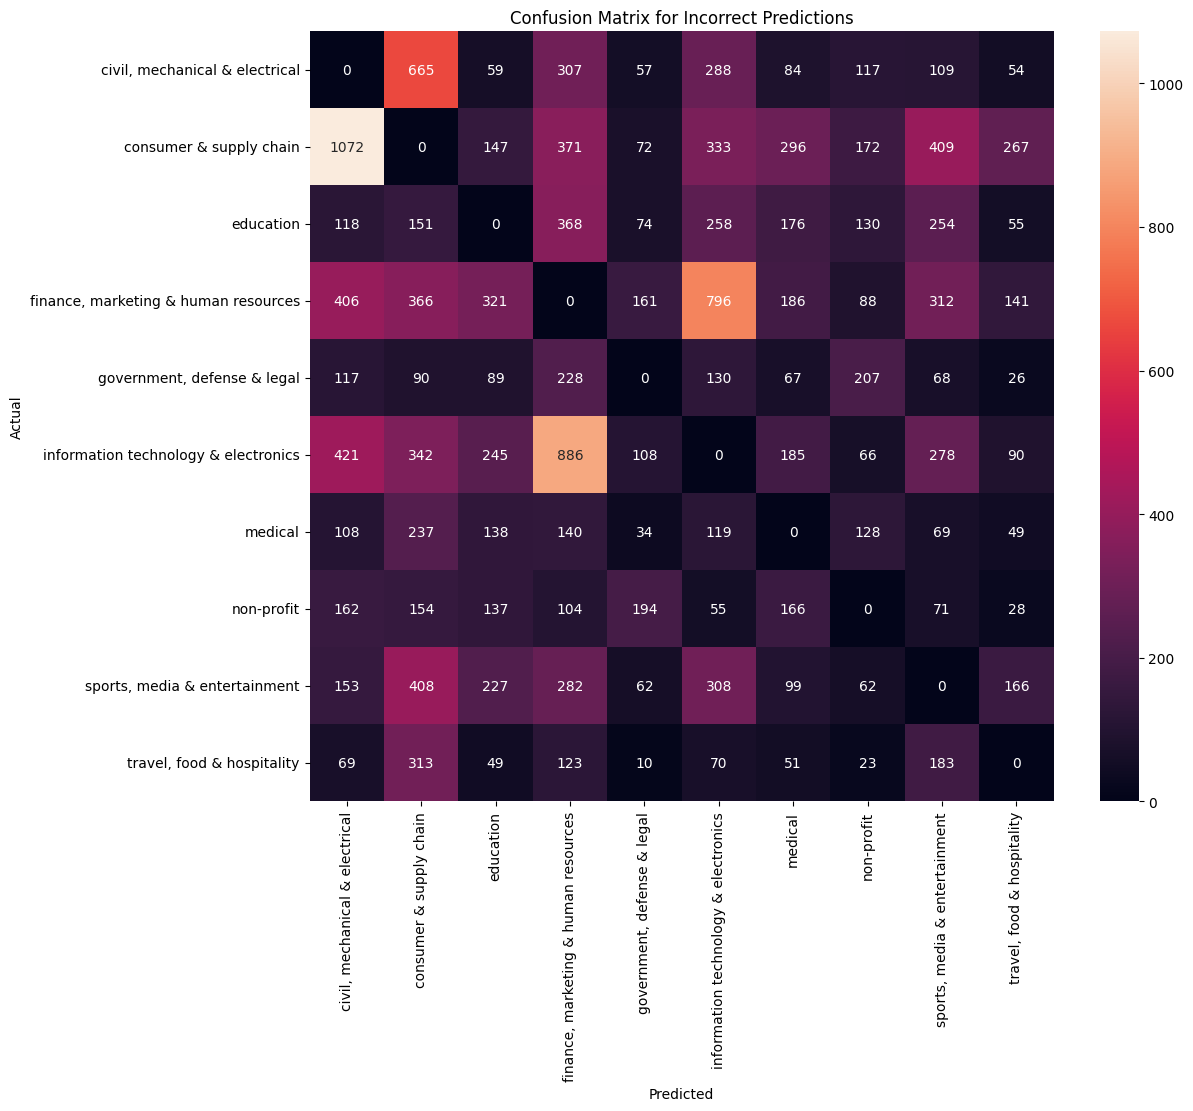

Label Distribution in Incorrect Predictions:
actual_label
consumer & supply chain                 3139
finance, marketing & human resources    2777
information technology & electronics    2621
sports, media & entertainment           1767
civil, mechanical & electrical          1740
education                               1584
non-profit                              1071
medical                                 1022
government, defense & legal             1022
travel, food & hospitality               891
Name: count, dtype: int64
Text Length Analysis:
                                       count         mean          std   min  \
actual_label                                                                   
civil, mechanical & electrical        1740.0  1309.624713  2164.024490  19.0   
consumer & supply chain               3139.0  1232.704683  2662.284325  14.0   
education                             1584.0  1381.815025  3745.375728  31.0   
finance, marketing & human resources  2777.0

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Display a sample of incorrect predictions
print("Sample Incorrect Predictions:")
print(error_results[['extractive_summary', 'actual_label', 'predicted_label']].head())

# Generate confusion matrix
conf_matrix = confusion_matrix(error_results['actual_label'], error_results['predicted_label'], labels=label_encoder.classes_)

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Incorrect Predictions')
plt.show()

# Analyze label distribution in incorrect predictions
label_counts = error_results['actual_label'].value_counts()
print("Label Distribution in Incorrect Predictions:")
print(label_counts)

# Examine text characteristics
error_results['extractive_summary'] = error_results['extractive_summary'].astype(str)
error_results['text_length'] = error_results['extractive_summary'].apply(len)
length_summary = error_results.groupby('actual_label')['text_length'].describe()
print("Text Length Analysis:")
print(length_summary)


In [6]:
error_results[['extractive_summary', 'actual_label', 'predicted_label']]

,extractive_summary,actual_label,predicted_label
0,"We provide our Members with the teammates, too...",information technology & electronics,medical
1,Pack Your Own Mix and match all the varieties ...,"finance, marketing & human resources",consumer & supply chain
2,I have been involved in education parallel to ...,"sports, media & entertainment",education
3,"I love you Dad. People stared, but it was with...",consumer & supply chain,education
4,Lauricare™ leaves a barrier on your skin Power...,medical,consumer & supply chain
...,...,...,...
17629,cookielawinfo-checkbox-functional 11 months Th...,"finance, marketing & human resources","civil, mechanical & electrical"
17630,8 multi-purpose mono/stereo input channels 2 s...,"civil, mechanical & electrical",information technology & electronics
17631,Title: 22 DEGREES Content: CONTACT The 22 DEGR...,"sports, media & entertainment",non-profit
17632,Are you ready to make the most of your loyalty...,"finance, marketing & human resources",information technology & electronics


In [7]:
error_results

,content,label,label_coarse,pp_url,extractive_summary,content_word_count,summary_word_count,label_fine,labels,actual_label,predicted_label,fine_label,predicted_label2,predicted_label3,text_length
0,Site Overview:\n\n\n[PAGE]\nTitle: \nTeam - He...,information technology and services,information technology & electronics,https://www.heurohealth.com/privacy-policy/,"We provide our Members with the teammates, too...",1568,130,information technology and services,5,information technology & electronics,medical,information technology and services,information technology & electronics,"finance, marketing & human resources",846
1,Site Overview:\n\n\n[PAGE]\nTitle: Apples | Fl...,management consulting,"finance, marketing & human resources",https://www.flycreekcidermill.com/privacy-policy,Pack Your Own Mix and match all the varieties ...,640,97,management consulting,3,"finance, marketing & human resources",consumer & supply chain,management consulting,"travel, food & hospitality","sports, media & entertainment",560
2,Site Overview:\n\n\n[PAGE]\nTitle: Heiko Wolfg...,photography,"sports, media & entertainment",https://www.heikoryll.com/privacy-policy,I have been involved in education parallel to ...,2691,103,photography,8,"sports, media & entertainment",education,photography,"finance, marketing & human resources",information technology & electronics,555
3,Site Overview:\n\n\n[PAGE]\nTitle: F.A.Q. Abou...,arts and crafts,consumer & supply chain,http://www.milward.org.uk/privacy.htm,"I love you Dad. People stared, but it was with...",5728,170,arts and crafts,1,consumer & supply chain,education,arts and crafts,"sports, media & entertainment",consumer & supply chain,842
4,Site Overview:\n\n\n[PAGE]\nTitle: LAURICIDIN®...,"health, wellness and fitness",medical,https://www.lauricidin.com/privacy-policy,Lauricare™ leaves a barrier on your skin Power...,11136,211,"health, wellness and fitness",6,medical,consumer & supply chain,"health, wellness and fitness",medical,"civil, mechanical & electrical",1198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17629,Site Overview:\n\n\n[PAGE]\nTitle: Sitemap - L...,accounting,"finance, marketing & human resources",https://larsonpa.com/privacy-policy/,cookielawinfo-checkbox-functional 11 months Th...,945,101,accounting,3,"finance, marketing & human resources","civil, mechanical & electrical",accounting,"finance, marketing & human resources",consumer & supply chain,643
17630,Site Overview:\n\n\n[PAGE]\nTitle: Recruitment...,electrical/electronic manufacturing,"civil, mechanical & electrical",https://digigrid.net/privacy-policy,8 multi-purpose mono/stereo input channels 2 s...,13069,519,electrical/electronic manufacturing,0,"civil, mechanical & electrical",information technology & electronics,electrical/electronic manufacturing,"sports, media & entertainment","civil, mechanical & electrical",3377
17631,Site Overview:\n\n\n[PAGE]\nTitle: SUSTAINABIL...,sporting goods,"sports, media & entertainment",https://www.22degrees.co/privacy-policy,Title: 22 DEGREES Content: CONTACT The 22 DEGR...,4535,119,sporting goods,8,"sports, media & entertainment",non-profit,sporting goods,consumer & supply chain,"sports, media & entertainment",780
17632,Site Overview:\n\n\n[PAGE]\nTitle: Spoonity's ...,marketing and advertising,"finance, marketing & human resources",https://www.spoonity.com/privacy-policy/,Are you ready to make the most of your loyalty...,10125,133,marketing and advertising,3,"finance, marketing & human resources",information technology & electronics,marketing and advertising,"travel, food & hospitality",consumer & supply chain,792


In [8]:
error_results[['extractive_summary', 'actual_label', 'predicted_label']].iloc[0,0]

'We provide our Members with the teammates, tools, techniques and technology to learn more about their own health and lifestyle patterns, so they can make the small changes that make a big impact on their lives. Heuro Members can receive unlimited access to doctors, wellness coaches, programs and content that help you succeed in your health, wellbeing and lifestyle goals. Heuro provides our Members a full team to help you achieve wellness goals or navigate the system. Our Heuro teammates, including Member Engagement Specialists, wellness coaches and clinicians, provide the critical support and advocacy to both Members with chronic conditions and the providers caring for those patients. Our team of engagement specialists and clinicians provide outreach and connect with members to get them engaged with their overall health and wellbeing.'

In [9]:
# Analyze label distribution in incorrect predictions
label_counts = error_results['actual_label'].value_counts()
print("Label Distribution of the most miss classified classes in Incorrect Predictions:")
print(label_counts)

Label Distribution of the most miss classified classes in Incorrect Predictions:
actual_label
consumer & supply chain                 3139
finance, marketing & human resources    2777
information technology & electronics    2621
sports, media & entertainment           1767
civil, mechanical & electrical          1740
education                               1584
non-profit                              1071
medical                                 1022
government, defense & legal             1022
travel, food & hospitality               891
Name: count, dtype: int64


In [10]:
# Analyze label distribution in incorrect predictions
label_counts = error_results['predicted_label'].value_counts()
print("Label Distribution the most miss predicted classes in Incorrect Predictions:")
print(label_counts)

Label Distribution the most miss predicted classes in Incorrect Predictions:
predicted_label
finance, marketing & human resources    2809
consumer & supply chain                 2726
civil, mechanical & electrical          2626
information technology & electronics    2357
sports, media & entertainment           1753
education                               1412
medical                                 1310
non-profit                               993
travel, food & hospitality               876
government, defense & legal              772
Name: count, dtype: int64


In [11]:
# Analyze label distribution in incorrect predictions
label_counts = error_results['label_fine'].value_counts()
print("Label Distribution of the most miss classified classes in Incorrect Predictions:")
print(label_counts)

Label Distribution of the most miss classified classes in Incorrect Predictions:
label_fine
marketing and advertising              976
information technology and services    880
internet                               750
non-profit organization management     692
computer software                      470
                                      ... 
tobacco                                  5
supermarkets                             3
railroad manufacture                     2
ranching                                 1
judiciary                                1
Name: count, Length: 147, dtype: int64


In [12]:
label_counts.iloc[:45]

label_fine
marketing and advertising              976
information technology and services    880
internet                               750
non-profit organization management     692
computer software                      470
management consulting                  431
retail                                 427
design                                 378
construction                           371
health, wellness and fitness           359
food & beverages                       306
publishing                             295
professional training & coaching       287
financial services                     287
real estate                            282
hospital & health care                 281
consumer services                      269
hospitality                            254
education management                   250
leisure, travel & tourism              240
consumer goods                         237
environmental services                 233
automotive                             221


In [13]:
import pandas as pd

# # Load the provided CSV file
# file_path = '/mnt/data/error_result.csv'
# error_results = pd.read_csv(file_path)

# Analyze the label distribution in incorrect predictions
label_counts = error_results['label_fine'].value_counts()
print("Label Distribution of the most misclassified classes in Incorrect Predictions:")
print(label_counts)

# Define the output dictionary (abbreviated for simplicity)
# Given output dictionary
output = {
    'information technology and services': 'information technology & electronics', 
    'computer software' : 'information technology & electronics',
    'internet': 'information technology & electronics', 
    'telecommunications': 'information technology & electronics',
    'consumer electronics': 'information technology & electronics', 
    'information services': 'information technology & electronics',
    'computer & network security': 'information technology & electronics', 
    'computer hardware': 'information technology & electronics',
    'computer networking': 'information technology & electronics', 
    'semiconductors': 'information technology & electronics', 
    'wireless': 'information technology & electronics',
    'program development': 'information technology & electronics', 
    'nanotechnology': 'information technology & electronics',
    'health, wellness and fitness': 'medical', 
    'hospital & health care': 'medical', 
    'medical practice': 'medical', 
    'medical devices': 'medical',
    'pharmaceuticals': 'medical', 
    'biotechnology': 'medical', 
    'mental health care': 'medical', 
    'veterinary': 'medical', 
    'alternative medicine': 'medical',
    'automotive': 'civil, mechanical & electrical', 
    'electrical/electronic manufacturing': 'civil, mechanical & electrical',
    'mechanical or industrial engineering': 'civil, mechanical & electrical', 
    'oil & energy': 'civil, mechanical & electrical',
    'machinery': 'civil, mechanical & electrical', 
    'building materials': 'civil, mechanical & electrical', 
    'renewables & environment': 'civil, mechanical & electrical',
    'architecture & planning': 'civil, mechanical & electrical', 
    'chemicals': 'civil, mechanical & electrical', 
    'industrial automation': 'civil, mechanical & electrical',
    'utilities': 'civil, mechanical & electrical', 
    'mining & metals': 'civil, mechanical & electrical', 
    'airlines/aviation': 'civil, mechanical & electrical',
    'civil engineering': 'civil, mechanical & electrical', 
    'aviation & aerospace': 'civil, mechanical & electrical', 
    'glass, ceramics & concrete': 'civil, mechanical & electrical',
    'paper & forest products': 'civil, mechanical & electrical', 
    'shipbuilding': 'civil, mechanical & electrical',
    'railroad manufacture': 'civil, mechanical & electrical', 
    'construction': 'civil, mechanical & electrical',
    'education management': 'education', 
    'professional training & coaching': 'education', 
    'publishing': 'education', 
    'e-learning': 'education',
    'higher education': 'education', 
    'research': 'education', 
    'primary/secondary education': 'education', 
    'writing and editing': 'education',
    'market research': 'education', 
    'libraries': 'education', 
    'think tanks': 'education', 
    'translation and localization': 'education',
    'museums and institutions': 'education', 
    'marketing and advertising': 'finance, marketing & human resources',
    'financial services': 'finance, marketing & human resources', 
    'real estate': 'finance, marketing & human resources',
    'management consulting': 'finance, marketing & human resources', 
    'insurance': 'finance, marketing & human resources',
    'accounting': 'finance, marketing & human resources', 
    'investment management': 'finance, marketing & human resources',
    'banking': 'finance, marketing & human resources', 
    'commercial real estate': 'finance, marketing & human resources',
    'venture capital & private equity': 'finance, marketing & human resources', 
    'outsourcing/offshoring': 'finance, marketing & human resources',
    'import and export': 'finance, marketing & human resources', 
    'investment banking': 'finance, marketing & human resources',
    'capital markets': 'finance, marketing & human resources', 
    'staffing and recruiting': 'finance, marketing & human resources',
    'human resources': 'finance, marketing & human resources', 
    'non-profit organization management': 'non-profit', 
    'environmental services': 'non-profit',
    'philanthropy': 'non-profit', 
    'fund-raising': 'non-profit', 
    'public safety': 'non-profit', 
    'nonprofit organization management': 'non-profit',
    'hospitality': 'travel, food & hospitality', 
    'leisure, travel & tourism': 'travel, food & hospitality', 
    'food & beverages': 'travel, food & hospitality',
    'restaurants': 'travel, food & hospitality', 
    'wine and spirits': 'travel, food & hospitality', 
    'gambling & casinos': 'travel, food & hospitality',
    'entertainment':'sports, media & entertainment', 
    'sports':'sports, media & entertainment', 
    'events services':'sports, media & entertainment',
    'media production':'sports, media & entertainment', 
    'music':'sports, media & entertainment', 
    'online media':'sports, media & entertainment',
    'sporting goods':'sports, media & entertainment', 
    'photography':'sports, media & entertainment', 
    'broadcast media':'sports, media & entertainment',
    'graphic design':'sports, media & entertainment', 
    'computer games':'sports, media & entertainment', 
    'recreational facilities and services':'sports, media & entertainment',
    'motion pictures and film':'sports, media & entertainment', 
    'animation':'sports, media & entertainment', 
    'newspapers':'sports, media & entertainment',
    'public relations and communications':'sports, media & entertainment', 
    'fine art':'sports, media & entertainment', 
    'performing arts':'sports, media & entertainment',
    'printing':'sports, media & entertainment', 
    'law practice': 'government, defense & legal', 
    'legal services': 'government, defense & legal',
    'civic & social organization': 'government, defense & legal', 
    'security and investigations': 'government, defense & legal',
    'government administration': 'government, defense & legal', 
    'religious institutions': 'government, defense & legal', 
    'defense & space': 'government, defense & legal',
    'public policy': 'government, defense & legal', 
    'political organization': 'government, defense & legal', 
    'government relations': 'government, defense & legal',
    'international affairs': 'government, defense & legal', 
    'law enforcement': 'government, defense & legal', 
    'judiciary': 'government, defense & legal',
    'legislative office': 'government, defense & legal', 
    'military': 'government, defense & legal', 
    'alternative dispute resolution': 'government, defense & legal',
    'executive office': 'government, defense & legal', 
    'retail': 'consumer & supply chain', 
    'apparel & fashion': 'consumer & supply chain',
    'design': 'consumer & supply chain', 
    'consumer goods': 'consumer & supply chain', 
    'consumer services': 'consumer & supply chain', 
    'wholesale': 'consumer & supply chain',
    'facilities services': 'consumer & supply chain', 
    'furniture': 'consumer & supply chain', 
    'food production': 'consumer & supply chain',
    'business supplies and equipment': 'consumer & supply chain', 
    'logistics and supply chain': 'consumer & supply chain',
    'individual & family services': 'consumer & supply chain', 
    'luxury goods & jewelry': 'consumer & supply chain', 
    'packaging and containers': 'consumer & supply chain',
    'plastics': 'consumer & supply chain', 
    'package/freight delivery': 'consumer & supply chain', 
    'dairy': 'consumer & supply chain',
    'supermarkets': 'consumer & supply chain', 
    'fishery': 'consumer & supply chain', 
    'international trade and development': 'consumer & supply chain',
    'cosmetics': 'consumer & supply chain', 
    'farming': 'consumer & supply chain', 
    'textiles': 'consumer & supply chain', 
    'warehousing': 'consumer & supply chain',
    'tobacco': 'consumer & supply chain', 
    'ranching': 'consumer & supply chain', 
    'transportation/trucking/railroad': 'consumer & supply chain',
    'maritime': 'consumer & supply chain', 
    'arts and crafts': 'consumer & supply chain'
}
# Reverse the dictionary
def reverse_dictionary(d):
    reversed_dict = {}
    for key, value in d.items():
        if value not in reversed_dict:
            reversed_dict[value] = [key]
        else:
            reversed_dict[value].append(key)
    return reversed_dict

reversed_output = reverse_dictionary(output)

# Confusion matrix and labels
confusion_matrix = conf_matrix

labels = [
    'civil, mechanical & electrical', 'consumer & supply chain',
    'education', 'finance, marketing & human resources',
    'government, defense & legal', 'information technology & electronics',
    'medical', 'non-profit', 'sports, media & entertainment', 'travel, food & hospitality'
]



Label Distribution of the most misclassified classes in Incorrect Predictions:
label_fine
marketing and advertising              976
information technology and services    880
internet                               750
non-profit organization management     692
computer software                      470
                                      ... 
tobacco                                  5
supermarkets                             3
railroad manufacture                     2
ranching                                 1
judiciary                                1
Name: count, Length: 147, dtype: int64


In [14]:
# Step 1: Find the samples with true label 'consumer & supply chain'
true_label_samples = error_results[error_results['label_coarse'] == 'consumer & supply chain']

# Step 2: Among these, find samples predicted as 'civil, mechanical & electrical'
misclassified_samples = true_label_samples[true_label_samples['predicted_label'] == 'civil, mechanical & electrical']

# Step 3: Aggregate them on fine-grain label
misclassified_label_counts = misclassified_samples['label_fine'].value_counts()

print(f"Fine-grain labels in 'consumer & supply chain' misclassified as 'civil, mechanical & electrical':\n{misclassified_label_counts}")
print(f"Total misclassifications from 'consumer & supply chain' to 'civil, mechanical & electrical': {misclassified_samples.shape[0]}")

Fine-grain labels in 'consumer & supply chain' misclassified as 'civil, mechanical & electrical':
label_fine
wholesale                              124
retail                                 123
facilities services                    113
consumer services                       99
consumer goods                          95
design                                  85
business supplies and equipment         77
transportation/trucking/railroad        76
plastics                                65
maritime                                29
logistics and supply chain              27
packaging and containers                27
furniture                               25
international trade and development     20
farming                                 17
textiles                                14
warehousing                             12
apparel & fashion                       12
food production                          9
arts and crafts                          5
individual & family services   

In [15]:
labels = [
    'civil, mechanical & electrical', 'consumer & supply chain',
    'education', 'finance, marketing & human resources',
    'government, defense & legal', 'information technology & electronics',
    'medical', 'non-profit', 'sports, media & entertainment', 'travel, food & hospitality'
]

In [16]:
# Step 1: Find the samples with true label 'consumer & supply chain'
true_label_samples = error_results[error_results['label_coarse'] == 'information technology & electronics']

# Step 2: Among these, find samples predicted as 'civil, mechanical & electrical'
misclassified_samples = true_label_samples[true_label_samples['predicted_label'] == 'finance, marketing & human resources']

# Step 3: Aggregate them on fine-grain label
misclassified_label_counts = misclassified_samples['label_fine'].value_counts()

print(f"Fine-grain labels in 'information technology & electronics' misclassified as 'finance, marketing & human resources':\n{misclassified_label_counts}")
print(f"Total misclassifications from 'information technology & electronics' to 'finance, marketing & human resources': {misclassified_samples.shape[0]}")

Fine-grain labels in 'information technology & electronics' misclassified as 'finance, marketing & human resources':
label_fine
information technology and services    330
internet                               319
computer software                      140
information services                    44
telecommunications                      29
computer networking                      5
consumer electronics                     5
computer hardware                        4
program development                      3
computer & network security              2
semiconductors                           2
wireless                                 2
nanotechnology                           1
Name: count, dtype: int64
Total misclassifications from 'information technology & electronics' to 'finance, marketing & human resources': 886


In [17]:
misclassified_samples [['content', 'actual_label','predicted_label','extractive_summary','pp_url','label_fine']]

,content,actual_label,predicted_label,extractive_summary,pp_url,label_fine
6,Site Overview:\n\n\n[PAGE]\nTitle: Marketing &...,information technology & electronics,"finance, marketing & human resources",Title: Marketing & Web Design Agency in Lincol...,https://www.energycell.co.uk/privacy-policy.php,internet
7,Site Overview:\n\n\n[PAGE]\nTitle: About | NuR...,information technology & electronics,"finance, marketing & human resources",We believe actual ownership will allow us to s...,https://www.nuresolution.com/privacy-policy/,telecommunications
17,Site Overview:\n\n\n[PAGE]\nTitle: Why Do Cont...,information technology & electronics,"finance, marketing & human resources",What expenses can you claim? So there’s no nat...,https://www.contractorcalculator.co.uk/privacy...,internet
48,Site Overview:\n\n\n[PAGE]\nTitle: Adlooker fo...,information technology & electronics,"finance, marketing & human resources",Title: Terms and Conditions | Adlooker Content...,https://www.adlooker.com/privacy.html,internet
54,Site Overview:\n\n\n[PAGE]\nTitle: ANALYTICS -...,information technology & electronics,"finance, marketing & human resources",Train the model on the training data. In order...,https://www.hedgeness.com/privacy-policy.html,computer software
...,...,...,...,...,...,...
17501,Site Overview:\n\n\n[PAGE]\nTitle: Download - ...,information technology & electronics,"finance, marketing & human resources","""symbol"":typeof e},n=function(){function e(e,t...",https://www.pbxdom.com/privacy-policy/,internet
17545,Site Overview:\n\n\n[PAGE]\nTitle: TBD for sma...,information technology & electronics,"finance, marketing & human resources",Read how TBD has helped other companies dramat...,http://teambusinessdevelopment.co.uk/privacy-p...,computer software
17552,Site Overview:\n\n\n[PAGE]\nTitle: Online Repu...,information technology & electronics,"finance, marketing & human resources",Email Marketing Direct marketing that works if...,https://www.internetmarketingmagicians.com/pri...,internet
17557,Site Overview:\n\n\n[PAGE]\nTitle: Employee ad...,information technology & electronics,"finance, marketing & human resources","And if you like, we can provide the expertise ...",https://soveryus.com/cookies-and-privacy/,computer software


In [18]:
misclassified_samples [['content', 'actual_label','predicted_label','extractive_summary','pp_url','label_fine']].iloc[-1]

content               Site Overview:\n\n\n[PAGE]\nTitle: Consulting ...
actual_label                       information technology & electronics
predicted_label                    finance, marketing & human resources
extractive_summary    Title: Consulting - Fogdog Solutions Content: ...
pp_url                   http://www.fogdogsolutions.com/privacy-policy/
label_fine                          information technology and services
Name: 17592, dtype: object

In [19]:
misclassified_samples [['content', 'actual_label','predicted_label','extractive_summary','pp_url','label_fine']].iloc[-1, 3]

"Title: Consulting - Fogdog Solutions Content: CONTACT US Fogdog Solutions seeks to solve the challenges organizations face day in and day out and our flexible service offerings and affiliations have earned praise for our unique personal service, quality and sense of urgency. What we can do for you: Whether placing talent on a permanent, temporary, contingent or project basis, Fogdog Solutions will deliver the experience and expertise required – when its required. Our team prides itself in the quality of our services and we strive to obtain the best match possible while balancing the needs of our clients to those of our candidates. Title: Executive Search - Fogdog Solutions Content: CONTACT US Fogdog Solutions offers discrete, nationwide, expeditious and cost-effective recruitment services for our clients. But you can send us an email and we'll get back to you, asap."

In [ ]:
# Step 1: Find the samples with true label 'consumer & supply chain'
true_label_samples = error_results[error_results['label_coarse'] == 'finance, marketing & human resources']

# Step 2: Among these, find samples predicted as 'civil, mechanical & electrical'
misclassified_samples = true_label_samples[true_label_samples['predicted_label'] =='information technology & electronics']

# Step 3: Aggregate them on fine-grain label
misclassified_label_counts = misclassified_samples['label_fine'].value_counts()

print(f"Fine-grain labels in 'finance, marketing & human resources' misclassified as 'information technology & electronics':\n{misclassified_label_counts}")
print(f"Total misclassifications from 'finance, marketing & human resources' to 'information technology & electronics': {misclassified_samples.shape[0]}")

Fine-grain labels in 'finance, marketing & human resources' misclassified as 'information technology & electronics':
label_fine
marketing and advertising    19
management consulting         5
financial services            4
human resources               3
staffing and recruiting       3
real estate                   3
accounting                    2
commercial real estate        1
investment management         1
outsourcing/offshoring        1
Name: count, dtype: int64
Total misclassifications from 'finance, marketing & human resources' to 'information technology & electronics': 42


In [ ]:
test_data

,content,label,label_coarse,pp_url,extractive_summary,content_word_count,summary_word_count
13754,Site Overview:\n\n\n[PAGE]\nTitle: \nTeam - He...,information technology and services,information technology & electronics,https://www.heurohealth.com/privacy-policy/,"We provide our Members with the teammates, too...",1568,130
134642,Site Overview:\n\n\n[PAGE]\nTitle: Olivia Maca...,food & beverages,"travel, food & hospitality",https://oliviamacaron.com/pages/privacy-policy,Whether you're looking for wedding favors or a...,4765,152
182561,Site Overview:\n\n\n[PAGE]\nTitle: Loft & Cavi...,construction,"civil, mechanical & electrical",https://www.am-energy.com/privacy-policy/,This has led to further collaboration on other...,20574,505
65151,Site Overview:\n\n\n[PAGE]\nTitle: \n Buy F...,"health, wellness and fitness",medical,https://ronniecoleman.net/pages/privacy-policy,If it doesn't perform the way you want it to o...,12126,134
64496,Site Overview:\n\n\n[PAGE]\nTitle: Apply for h...,legal services,"government, defense & legal",https://www.law-arts.org/privacy-policy,No fees will be due until your application has...,698,169
...,...,...,...,...,...,...,...
87021,Site Overview:\n\n\n[PAGE]\nTitle: Upload Docu...,financial services,"finance, marketing & human resources",https://huecu.org/privacy-center/digital-priva...,Title: HUECU Membership - Harvard University E...,738,47
72047,Site Overview:\n\n\n[PAGE]\nTitle: Spoonity's ...,marketing and advertising,"finance, marketing & human resources",https://www.spoonity.com/privacy-policy/,Are you ready to make the most of your loyalty...,10125,133
104299,Site Overview:\n\n\n[PAGE]\nTitle: Contact us ...,arts and crafts,consumer & supply chain,https://www.a-n.co.uk/about/privacy-policy/,Title: a-n Artists Council - a-n The Artists I...,11303,210
188276,Site Overview:\n\n\n[PAGE]\nTitle: Book a Jewe...,retail,consumer & supply chain,https://www.anicejewellery.com/pages/privacy-p...,Title: Book a Jewellery Workshop in Prince Edw...,3440,82


In [ ]:
predictions

NameError: name 'predictions' is not defined

In [ ]:
predictions = trainer.predict(test_dataset)


/home/sxs7285/anaconda3/envs/industry/lib/python3.8/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


In [ ]:
predictions.predictions

array([[-0.7852238 , -0.13740873, -0.02725325, ..., -0.2587876 ,
        -0.46290252, -0.5615288 ],
       [-0.76598746, -0.27877018, -0.13964029, ..., -0.09771042,
        -0.24000198, -0.5748134 ],
       [ 1.6553056 ,  2.20546   , -0.5504031 , ..., -0.8196432 ,
        -0.5499564 ,  0.07105714],
       ...,
       [-0.49439597, -0.9748048 , -0.67620635, ..., -0.84686387,
        -0.35536268, -1.0916178 ],
       [ 0.6294452 , -0.12821917, -0.5235903 , ..., -0.86810493,
         0.22656937, -0.96542335],
       [-0.78974396, -0.38919878,  0.20681295, ...,  0.09417327,
         1.5458102 ,  0.05878744]], dtype=float32)

In [ ]:
import torch.nn.functional as F

# Apply softmax to the predictions
softmax_predictions = F.softmax(torch.tensor(predictions.predictions), dim=1)

# Get softmax of the first three samples
softmax_first_three = np.sort(softmax_predictions.cpu().numpy(),axis =1)[:,-3:]

In [ ]:
softmax_first_three

array([[0.03398969, 0.03794785, 0.77064407],
       [0.0563703 , 0.09478156, 0.55495626],
       [0.05505002, 0.26840332, 0.4652827 ],
       ...,
       [0.03137287, 0.37063834, 0.45943648],
       [0.06951199, 0.10399834, 0.6221389 ],
       [0.09138832, 0.10228442, 0.39023715]], dtype=float32)

In [ ]:
torch.sum(softmax_first_three,dim=1)


tensor([1.0000, 1.0000, 1.0000])

In [ ]:
softmax_predictions.cpu().numpy().shape

(1500, 10)

[nltk_data] Downloading package punkt to /home/sxs7285/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/home/sxs7285/anaconda3/envs/industry/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sxs7285/anaconda3/envs/industry/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sxs7285/anaconda3/envs/industry/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with 

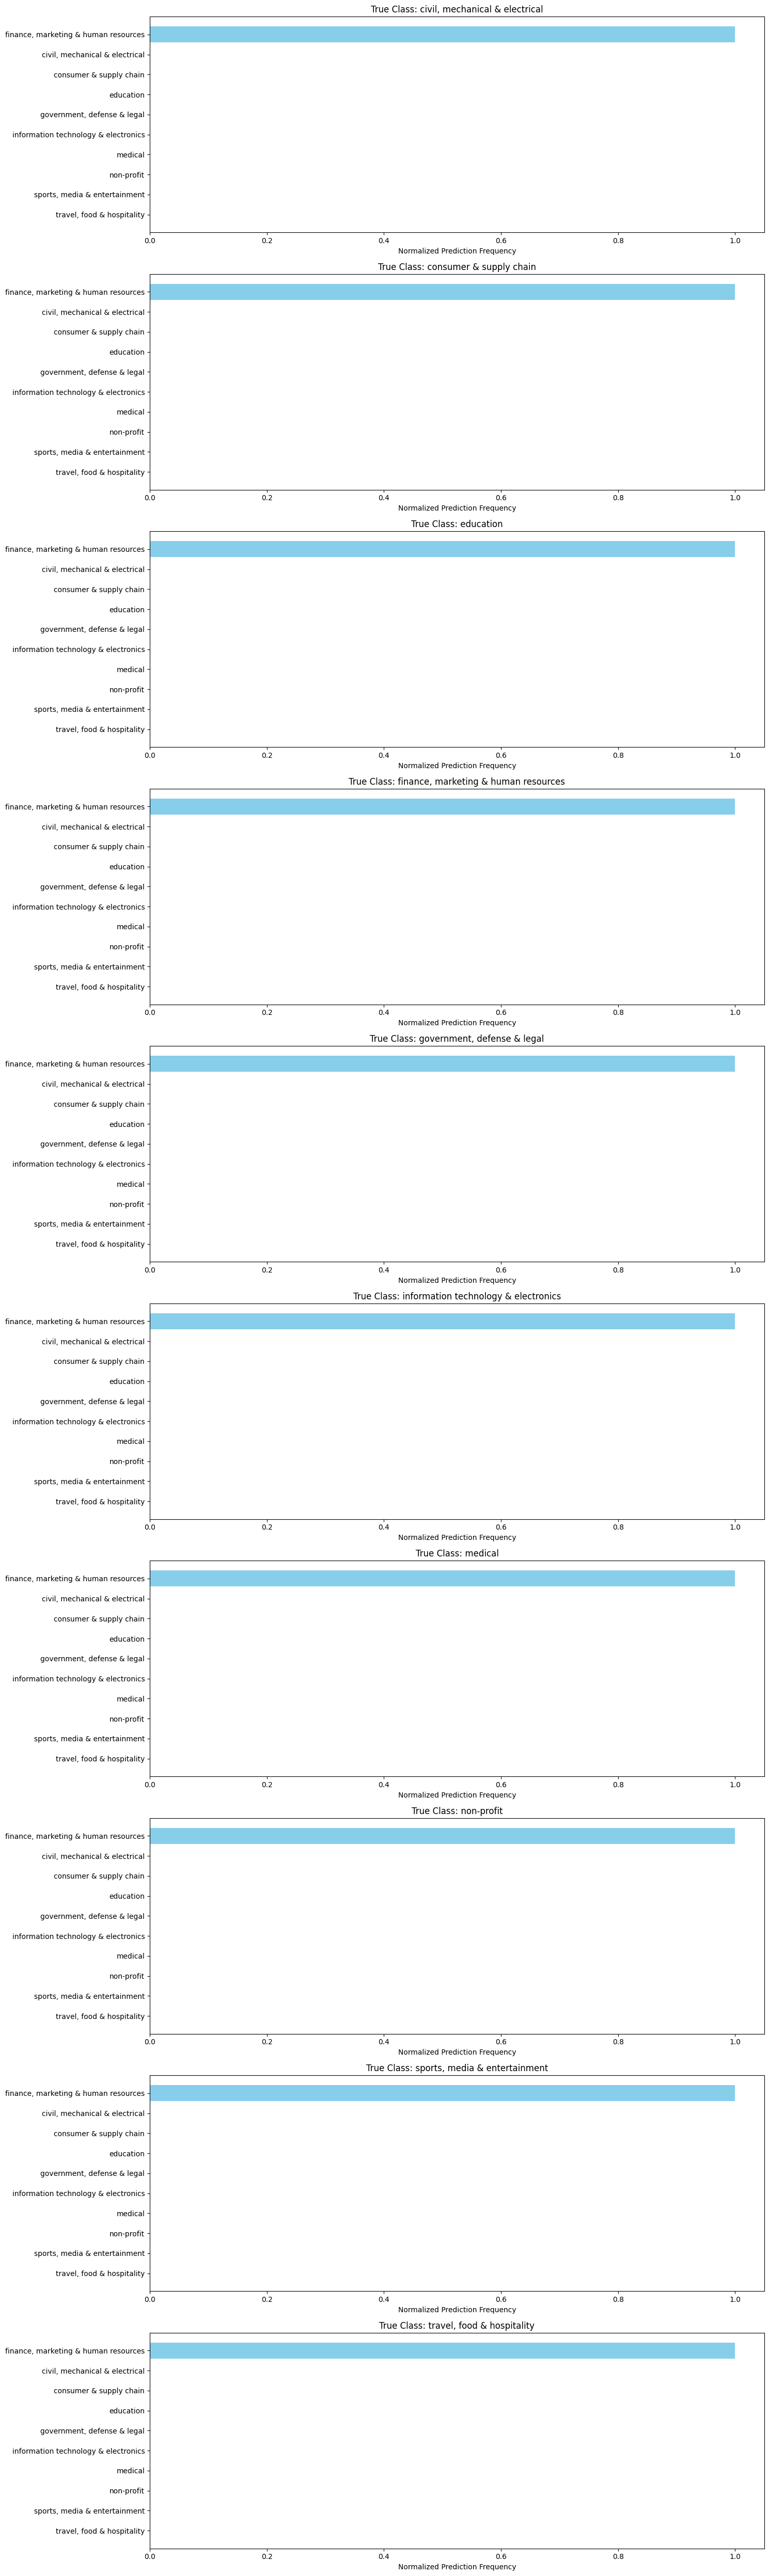

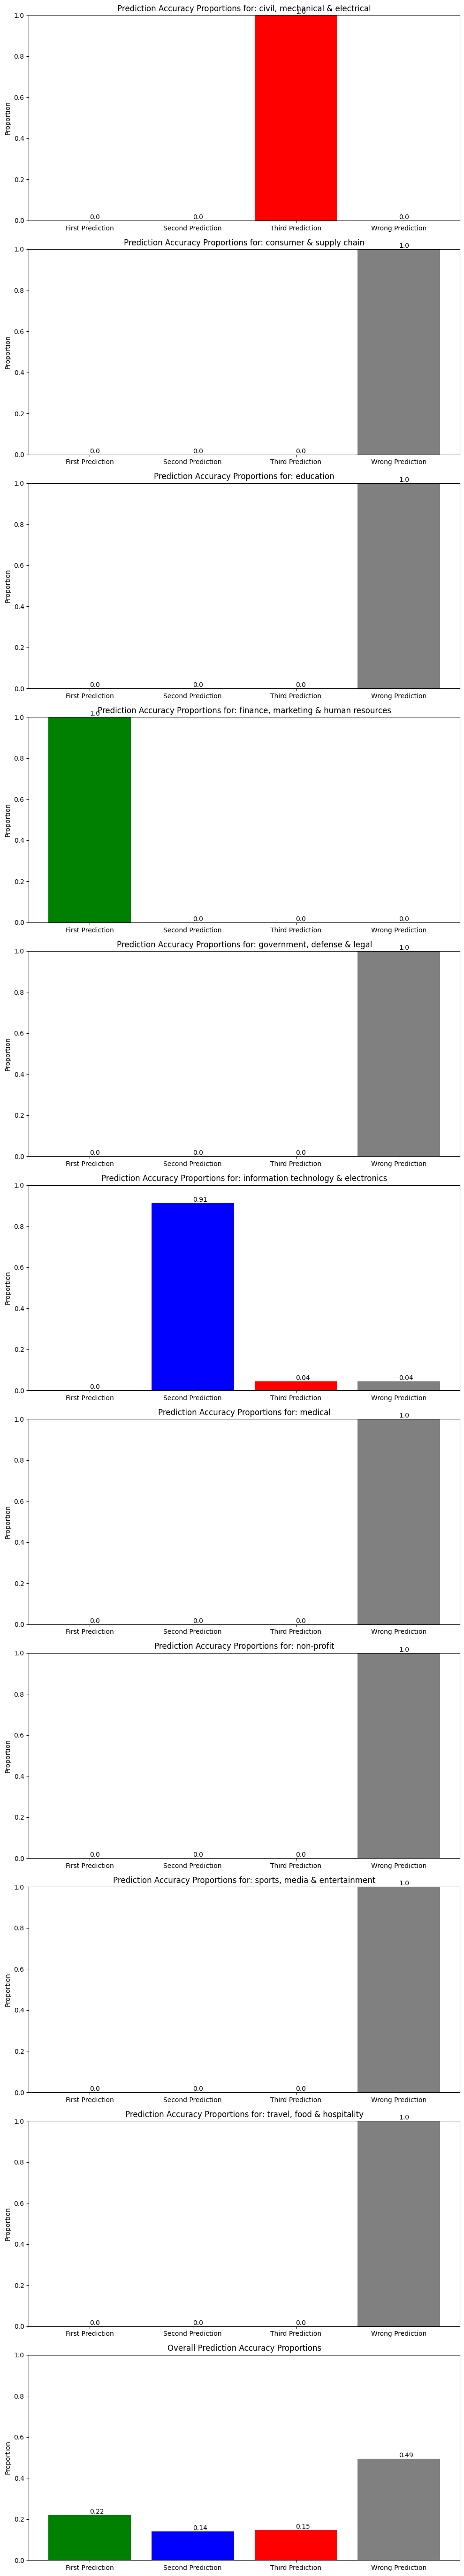

In [23]:
import os
import pandas as pd
import numpy as np
import re
import nltk
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from urllib.request import urlretrieve
import zipfile
import matplotlib.pyplot as plt
from scipy import stats
import torch.nn.functional as F

nltk.download('punkt')

# Ensure you have downloaded GloVe embeddings and placed them in a directory
glove_dir = '/data/sxs7285/Porjects_code/Linkedin/summary_summer/glove/'
glove_path = os.path.join(glove_dir, 'glove.6B.300d.txt')

# Download GloVe embeddings if not already present
if not os.path.exists(glove_path):
    os.makedirs(glove_dir, exist_ok=True)
    glove_url = 'http://nlp.stanford.edu/data/glove.6B.zip'
    glove_zip_path = os.path.join(glove_dir, 'glove.6B.zip')
    print("Downloading GloVe embeddings...")
    urlretrieve(glove_url, glove_zip_path)
    print("Extracting GloVe embeddings...")
    with zipfile.ZipFile(glove_zip_path, 'r') as zip_ref:
        zip_ref.extractall(glove_dir)
    os.remove(glove_zip_path)
    print("GloVe embeddings ready!")

# Load the GloVe model
def load_glove_model(glove_path):
    glove_model = {}
    with open(glove_path, 'r', encoding='utf-8') as f:
        for line in f:
            parts = line.split()
            word = parts[0]
            vector = np.asarray(parts[1:], dtype='float32')
            glove_model[word] = vector
    return glove_model

glove_model = load_glove_model(glove_path)

# Define directories
directory = "/data/sxs7285/Porjects_code/sector_activity/data/data_csv2/"
plot_directory = "/data/sxs7285/Porjects_code/sector_activity/classification_final/results/LSTM/"

# Create a directory for plots and results if it does not exist
result_directory = "/data/sxs7285/Porjects_code/sector_activity/classification_final/results/LSTM/"
if not os.path.exists(result_directory):
    os.makedirs(result_directory)

# Read the dataset
linkedin = pd.read_csv(os.path.join(directory, "Linekdin_dataset_Finale.csv"))

# Function to save results to a file
def save_to_file(content, file_path):
    with open(file_path, 'a') as f:
        f.write(content + '\n')

# Redirect print to file
import sys
class Logger(object):
    def __init__(self, file_path):
        self.terminal = sys.stdout
        self.log = open(file_path, "a")

    def write(self, message):
        self.terminal.write(message)
        self.log.write(message)

    def flush(self):
        pass

# Redirect all prints to results_file
results_file = os.path.join(result_directory, "results.txt")
sys.stdout = Logger(results_file)

# Function to calculate cumulative frequency and save to file
def cumulative_freq(data, word_count, results_file):
    quantiles = data[word_count].quantile([0.15, 0.25, 0.5, 0.75])
    total_samples = len(data[word_count])
    save_to_file(f"Total samples: {total_samples}", results_file)

    for quantile in quantiles.index:
        count_above = (data[word_count] > quantiles[quantile]).sum()
        save_to_file(f"Number of samples above the {quantile*100}% quantile ({quantiles[quantile]}): {count_above}", results_file)

cumulative_freq(linkedin, "content_word_count", results_file)
cumulative_freq(linkedin, "summary_word_count", results_file)

# Function to filter by word count quantile
def filter_by_word_count_quantile(df, word_count_column, quantile_threshold):
    quantile_value = df[word_count_column].quantile(quantile_threshold)
    filtered_df = df[df[word_count_column] >= quantile_value]
    return filtered_df

# Filtered dataset
filtered_linkedin = filter_by_word_count_quantile(linkedin, 'content_word_count', 0.15)

# filtered_linkedin = filtered_linkedin.sample(500)

save_to_file(f"Original dataset size: {len(linkedin)}", results_file)
save_to_file(f"Filtered dataset size: {len(filtered_linkedin)}", results_file)

# Split the data
class_column = 'label_coarse'
train_data_cv, test_data = train_test_split(filtered_linkedin, test_size=0.3, random_state=42, stratify=filtered_linkedin[class_column])
train_data, val_data = train_test_split(train_data_cv, test_size=0.2, random_state=42, stratify=train_data_cv[class_column])

save_to_file(f"Training data size: {train_data.shape[0]}", results_file)
save_to_file(f"Validation data size: {val_data.shape[0]}", results_file)
save_to_file(f"Test data size: {test_data.shape[0]}", results_file)

# Preprocess the data
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text

train_data['cleaned_summary'] = train_data['extractive_summary'].apply(clean_text)
val_data['cleaned_summary'] = val_data['extractive_summary'].apply(clean_text)
test_data['cleaned_summary'] = test_data['extractive_summary'].apply(clean_text)

# Transform text data into embeddings using GloVe
def text_to_embedding(text, model, embedding_dim=300):
    words = nltk.word_tokenize(text)
    word_vectors = [model[word] for word in words if word in model]
    if not word_vectors:
        return np.zeros((embedding_dim,))
    return np.mean(word_vectors, axis=0)

embedding_dim = 300
train_data['embedding'] = train_data['cleaned_summary'].apply(lambda x: text_to_embedding(x, glove_model, embedding_dim))
val_data['embedding'] = val_data['cleaned_summary'].apply(lambda x: text_to_embedding(x, glove_model, embedding_dim))
test_data['embedding'] = test_data['cleaned_summary'].apply(lambda x: text_to_embedding(x, glove_model, embedding_dim))

# Prepare the data for training
X_train = np.vstack(train_data['embedding'].values)
y_train = LabelEncoder().fit_transform(train_data['label_coarse'])
X_val = np.vstack(val_data['embedding'].values)
y_val = LabelEncoder().fit_transform(val_data['label_coarse'])
X_test = np.vstack(test_data['embedding'].values)
y_test = LabelEncoder().fit_transform(test_data['label_coarse'])

# Define the custom Dataset class
class TextDataset(Dataset):
    def __init__(self, embeddings, labels):
        self.embeddings = embeddings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.embeddings[idx], self.labels[idx]

# Create DataLoader
train_dataset = TextDataset(X_train, y_train)
val_dataset = TextDataset(X_val, y_val)
test_dataset = TextDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, embedding_dim, num_classes, hidden_dim, num_layers, bidirectional=True, dropout=0.5):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.bidirectional = bidirectional

        # LSTM layer
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers,
                            dropout=dropout, bidirectional=bidirectional)

        # Fully connected layer
        multiplier = 2 if bidirectional else 1
        self.fc = nn.Linear(hidden_dim * multiplier, num_classes)

        # Dropout layer
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        # LSTM layer
        x = x.unsqueeze(1)  # Add the sequence dimension
        x, _ = self.lstm(x)

        # Apply dropout to the output of the last time step
        if self.bidirectional:
            x = self.dropout(x[:, -1, :])  # Take the last time step's output for bidirectional LSTM
        else:
            x = self.dropout(x[:, -1, :])  # Take the last time step's output for single-direction LSTM

        # Fully connected layer
        x = self.fc(x)
        return x

# Parameters
embedding_dim = 300  # Same as your GloVe embeddings
hidden_dim = 256  # Number of LSTM units
num_layers = 2  # Number of LSTM layers
num_classes = len(np.unique(y_train))
bidirectional = True  # Using a bidirectional LSTM
dropout = 0.5  # Dropout rate

# Model initialization
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LSTMModel(embedding_dim, num_classes, hidden_dim, num_layers, bidirectional, dropout).to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)

# Training loop
num_epochs = 40
best_val_loss = float('inf')
best_model = None

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device).float(), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    avg_train_loss = running_loss / len(train_loader)
    
    # Validation step
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device).float(), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    avg_val_loss = val_loss / len(val_loader)
    
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}')
    
    # Update scheduler
    scheduler.step(avg_val_loss)
    
    # Check if this is the best model
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_model = model.state_dict()

# Load the best model
model.load_state_dict(best_model)

# Evaluation
model.eval()
all_preds = []
all_labels = []
all_probs = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device).float(), labels.to(device)
        outputs = model(inputs)
        probs = F.softmax(outputs, dim=1)
        _, preds = torch.max(outputs, 1)
        all_probs.extend(probs.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Classification report
report = classification_report(all_labels, all_preds, target_names=LabelEncoder().fit(train_data['label_coarse']).classes_)
print(report)
save_to_file(report, results_file)

# Calculate top-N accuracy
def top_n_accuracy(y_true, y_pred_probs, n=1):
    top_n_preds = np.argsort(y_pred_probs, axis=1)[:, -n:]
    matches = np.any(top_n_preds == np.array(y_true).reshape(-1, 1), axis=1)
    return np.mean(matches)

# Evaluate and print top-N accuracies
print(f"Top-1 Accuracy: {top_n_accuracy(all_labels, all_probs, n=1):.2f}")
print(f"Top-2 Accuracy: {top_n_accuracy(all_labels, all_probs, n=2):.2f}")
print(f"Top-3 Accuracy: {top_n_accuracy(all_labels, all_probs, n=3):.2f}")
save_to_file(f"Top-1 Accuracy: {top_n_accuracy(all_labels, all_probs, n=1):.2f}", results_file)
save_to_file(f"Top-2 Accuracy: {top_n_accuracy(all_labels, all_probs, n=2):.2f}", results_file)
save_to_file(f"Top-3 Accuracy: {top_n_accuracy(all_labels, all_probs, n=3):.2f}", results_file)

# Generate confusion matrix for top-1 accuracy
conf_matrix_top1 = confusion_matrix(all_labels, all_preds)
print("Confusion Matrix (Top-1, LSTM):\n", conf_matrix_top1)

# Normalize the confusion matrix row-wise
conf_matrix_normalized = conf_matrix_top1 / conf_matrix_top1.sum(axis=1, keepdims=True)

# Rank predictions for each class (highest to lowest)
ranked_predictions = np.argsort(-conf_matrix_normalized, axis=1)

# Translate ranked label indices back to class names
ranked_class_names = np.array(LabelEncoder().fit(train_data['label_coarse']).classes_)[ranked_predictions]

# Display the ranked predictions for each true class
ranked_class_names_dict = {LabelEncoder().fit(train_data['label_coarse']).classes_[i]: ranked_class_names[i].tolist() for i in range(len(LabelEncoder().fit(train_data['label_coarse']).classes_))}
print(ranked_class_names_dict)

# Visualize the ranking of predictions for each class
fig, axes = plt.subplots(len(LabelEncoder().fit(train_data['label_coarse']).classes_), 1, figsize=(15, 5*len(LabelEncoder().fit(train_data['label_coarse']).classes_)))
axes = axes.flatten()

for i, class_name in enumerate(LabelEncoder().fit(train_data['label_coarse']).classes_):
    # Get indices for sorting the classes based on the confusion matrix
    sorted_indices = np.argsort(-conf_matrix_normalized[i])
    sorted_values = conf_matrix_normalized[i][sorted_indices]
    sorted_class_names = np.array(LabelEncoder().fit(train_data['label_coarse']).classes_)[sorted_indices]

    axes[i].barh(sorted_class_names, sorted_values, color='skyblue')
    axes[i].set_title(f'True Class: {class_name}')
    axes[i].invert_yaxis()  # Highest values at the top
    axes[i].set_xlabel('Normalized Prediction Frequency')

plt.tight_layout()
plt.savefig(os.path.join(plot_directory, "ranking_predictions_per_class.png"))

top_3_preds = np.argsort(np.array(all_probs), axis=1)[:, -3:]  # Get the indices of the top three predictions

# Initialize counters for each position
first_pred_correct = np.zeros(len(LabelEncoder().fit(train_data['label_coarse']).classes_))
second_pred_correct = np.zeros(len(LabelEncoder().fit(train_data['label_coarse']).classes_))
third_pred_correct = np.zeros(len(LabelEncoder().fit(train_data['label_coarse']).classes_))
wrong_preds = np.zeros(len(LabelEncoder().fit(train_data['label_coarse']).classes_))
total_counts = np.zeros(len(LabelEncoder().fit(train_data['label_coarse']).classes_))

for true, preds in zip(all_labels, top_3_preds):
    total_counts[true] += 1
    if preds[2] == true:
        first_pred_correct[true] += 1
    if preds[1] == true:
        second_pred_correct[true] += 1
    if preds[0] == true:
        third_pred_correct[true] += 1
    if true not in preds:
        wrong_preds[true] += 1

# Calculate proportions for each class
first_pred_proportions = first_pred_correct / total_counts
second_pred_proportions = second_pred_correct / total_counts
third_pred_proportions = third_pred_correct / total_counts
wrong_pred_proportions = wrong_preds / total_counts

# Calculate total proportions across all classes
total_first = np.sum(first_pred_correct) / np.sum(total_counts)
total_second = np.sum(second_pred_correct) / np.sum(total_counts)
total_third = np.sum(third_pred_correct) / np.sum(total_counts)
total_wrong = np.sum(wrong_preds) / np.sum(total_counts)

# Visualization for each class
fig, axes = plt.subplots(len(LabelEncoder().fit(train_data['label_coarse']).classes_) + 1, 1, figsize=(10, 5 * (len(LabelEncoder().fit(train_data['label_coarse']).classes_) + 1)))  # +1 for the total plot
for i, class_name in enumerate(LabelEncoder().fit(train_data['label_coarse']).classes_):
    bars = axes[i].bar(['First Prediction', 'Second Prediction', 'Third Prediction', 'Wrong Prediction'],
                       [first_pred_proportions[i], second_pred_proportions[i], third_pred_proportions[i], wrong_pred_proportions[i]],
                       color=['green', 'blue', 'red', 'grey'])
    axes[i].set_title(f'Prediction Accuracy Proportions for: {class_name}')
    axes[i].set_ylabel('Proportion')
    axes[i].set_ylim(0, 1)
    for bar in bars:
        yval = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')  # Label the bars

# Overall visualization
bars = axes[-1].bar(['First Prediction', 'Second Prediction', 'Third Prediction', 'Wrong Prediction'],
                    [total_first, total_second, total_third, total_wrong],
                    color=['green', 'blue', 'red', 'grey'])
axes[-1].set_title('Overall Prediction Accuracy Proportions')
axes[-1].set_ylabel('Proportion')
axes[-1].set_ylim(0, 1)
for bar in bars:
    yval = bar.get_height()
    axes[-1].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')  # Label the bars

plt.tight_layout()
plt.savefig(os.path.join(plot_directory, "prediction_accuracy_proportions.png"))



# Function to train and evaluate the model
def train_and_evaluate(train_loader, val_loader):
    model = LSTMModel(embedding_dim=embedding_dim, num_classes=num_classes, hidden_dim=hidden_dim, num_layers=num_layers, bidirectional=bidirectional, dropout=dropout).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0001)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)
    
    num_epochs = 30
    best_val_loss = float('inf')
    best_model = None

    for epoch in range(num_epochs):
        model.train() 
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device).float(), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        avg_train_loss = running_loss / len(train_loader)
        
        # Validation step
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device).float(), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
        avg_val_loss = val_loss / len(val_loader)
        
        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}')
        
        # Update scheduler
        scheduler.step(avg_val_loss)
        
        # Check if this is the best model
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            best_model = model.state_dict()

    # Load the best model
    model.load_state_dict(best_model)

    # Evaluation
    model.eval()
    all_preds = []
    all_labels = []
    all_probs = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device).float(), labels.to(device)
            outputs = model(inputs)
            probs = F.softmax(outputs, dim=1)
            _, preds = torch.max(outputs, 1)
            all_probs.extend(probs.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return all_labels, all_preds, all_probs



embedding_dim = 300

train_data_cv['cleaned_summary'] = train_data_cv['extractive_summary'].apply(clean_text)

train_data_cv['embedding'] = train_data_cv['cleaned_summary'].apply(lambda x: text_to_embedding(x, glove_model, embedding_dim))

# Prepare the data for training
X = np.vstack(train_data_cv['embedding'].values)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(train_data_cv['label_coarse'])

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = []
top1_accuracies = []
top2_accuracies = []
top3_accuracies = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    print(f'Fold {fold + 1}/{kf.n_splits}')
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    train_dataset = TextDataset(X_train, y_train)
    val_dataset = TextDataset(X_val, y_val)
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
    
    all_labels, all_preds, all_probs = train_and_evaluate(train_loader, val_loader)
    
    accuracy_scores.append(accuracy_score(all_labels, all_preds))
    top1_accuracies.append(top_n_accuracy(all_labels, all_probs, n=1))
    top2_accuracies.append(top_n_accuracy(all_labels, all_probs, n=2))
    top3_accuracies.append(top_n_accuracy(all_labels, all_probs, n=3))

# Calculate mean and confidence intervals
def mean_confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    sem = stats.sem(data)
    h = sem * stats.t.ppf((1 + confidence) / 2., n-1)
    return mean, h

accuracy_mean, accuracy_ci = mean_confidence_interval(accuracy_scores)
top1_mean, top1_ci = mean_confidence_interval(top1_accuracies)
top2_mean, top2_ci = mean_confidence_interval(top2_accuracies)
top3_mean, top3_ci = mean_confidence_interval(top3_accuracies)

save_to_file(f"Mean top1-Accuracy: {top1_mean:.2f}", results_file)
save_to_file(f"95% Confidence Interval for the top1_Mean Accuracy: {top1_ci}", results_file)

save_to_file(f"Mean top2-Accuracy: {top2_mean:.2f}", results_file)
save_to_file(f"95% Confidence Interval for the top2_Mean Accuracy: {top2_ci}", results_file)

save_to_file(f"Mean top3-Accuracy: {top3_mean:.2f}", results_file)
save_to_file(f"95% Confidence Interval for the top3_Mean Accuracy: {top3_ci}", results_file)

# Save all results to the results directory
with open(os.path.join(result_directory, "results_summary.txt"), 'w') as f:
    f.write("top1_Mean Accuracy: {:.2f}\n".format(top1_mean))
    f.write("95% Confidence Interval for the top1_Mean Accuracy: {}\n".format(top1_ci))

    f.write("top2_Mean Accuracy: {:.2f}\n".format(top2_mean))
    f.write("95% Confidence Interval for the top2_Mean Accuracy: {}\n".format(top2_ci))

    f.write("top3_Mean Accuracy: {:.2f}\n".format(top3_mean))
    f.write("95% Confidence Interval for the top3_Mean Accuracy: {}\n".format(top3_ci))


Total samples: 229944
Number of samples above the 15.0% quantile (336.0): 195428
Number of samples above the 25.0% quantile (837.0): 172430
Number of samples above the 50.0% quantile (3212.0): 114965
Number of samples above the 75.0% quantile (8255.0): 57476
Total samples: 229944
Number of samples above the 15.0% quantile (82.0): 194758
Number of samples above the 25.0% quantile (102.0): 171604
Number of samples above the 50.0% quantile (141.0): 113892
Number of samples above the 75.0% quantile (194.0): 57156
Original dataset size: 229944
Filtered dataset size: 1000


2024-07-02 11:26:26.569401: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-02 11:26:26.572010: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-02 11:26:26.623730: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-02 11:26:27.615943: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


GPU is available


/home/sxs7285/anaconda3/envs/industry/lib/python3.8/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


test_dataset Dataset({
    features: ['extractive_summary', 'labels', 'label_fine', '__index_level_0__'],
    num_rows: 300
})


Map:   0%|          | 0/560 [00:00<?, ? examples/s]

Map:   0%|          | 0/140 [00:00<?, ? examples/s]

Map:   0%|          | 0/300 [00:00<?, ? examples/s]

test_dataset Dataset({
    features: ['extractive_summary', 'labels', 'label_fine', '__index_level_0__', 'input_ids', 'attention_mask'],
    num_rows: 300
})
test_dataset Dataset({
    features: ['extractive_summary', 'labels', 'label_fine', '__index_level_0__', 'input_ids', 'attention_mask'],
    num_rows: 300
})


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: shahriar92 (ai-qualitative-data-analysis-experiment). Use `wandb login --relogin` to force relogin


/home/sxs7285/anaconda3/envs/industry/lib/python3.8/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,2.298600,2.283136,0.135714,0.018418,0.135714,0.032435
2,2.272900,2.260419,0.135714,0.018418,0.135714,0.032435
3,2.226900,2.226686,0.178571,0.091769,0.178571,0.097665
4,2.189900,2.183030,0.207143,0.068880,0.207143,0.093667
5,2.173000,2.168200,0.214286,0.097249,0.214286,0.093351


/home/sxs7285/anaconda3/envs/industry/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
wandb: Adding directory to artifact (/data/sxs7285/Porjects_code/sector_activity/classification_final/results/peft_roberta/results/checkpoint-18)... Done. 4.6s
/home/sxs7285/anaconda3/envs/industry/lib/python3.8/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/home/sxs7285/anaconda3/envs/industry/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. U

/home/sxs7285/anaconda3/envs/industry/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sxs7285/anaconda3/envs/industry/lib/python3.8/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


{'eval_loss': 2.1682004928588867, 'eval_accuracy': 0.2142857164144516, 'eval_precision': 0.09724867724867725, 'eval_recall': 0.21428571428571427, 'eval_f1': 0.09335075493612079, 'eval_runtime': 1.4514, 'eval_samples_per_second': 96.458, 'eval_steps_per_second': 3.445, 'epoch': 5.0}


/home/sxs7285/anaconda3/envs/industry/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sxs7285/anaconda3/envs/industry/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sxs7285/anaconda3/envs/industry/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

pred (300,) [3 3 3 3 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 5 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 5 5 3 3 3 5 3 5 3 3 5 3 3
 3 3 3 5 3 3 3 5 3 3 3 3 3 3 5 5 3 5 3 3 3 5 3 3 3 5 3 3 3 3 3 3 3 3 5 3 3
 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 3 3 3 5 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 3 5 3 3 3 3 3 3 3 3 3 5 3 3 3 3 3 3 3 3 3 5
 3 3 3 5 3 3 5 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 3
 3 3 5 3 3 3 3 3 3 3 3 3 5 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 3 3 3 3 5
 3 3 3 3]
test_data['labels'] (300,) 87203     5
3467      5
157518    8
132686    5
53904     0
         ..
201146    1
40406     3
141226    0
161769    0
203816    0
Name: labels, Length: 300, dtype: int64
                                      precision    recall  f1-score   support

      civil, mechanical & electrical       0.00      0.00      0.00        41
             consumer 

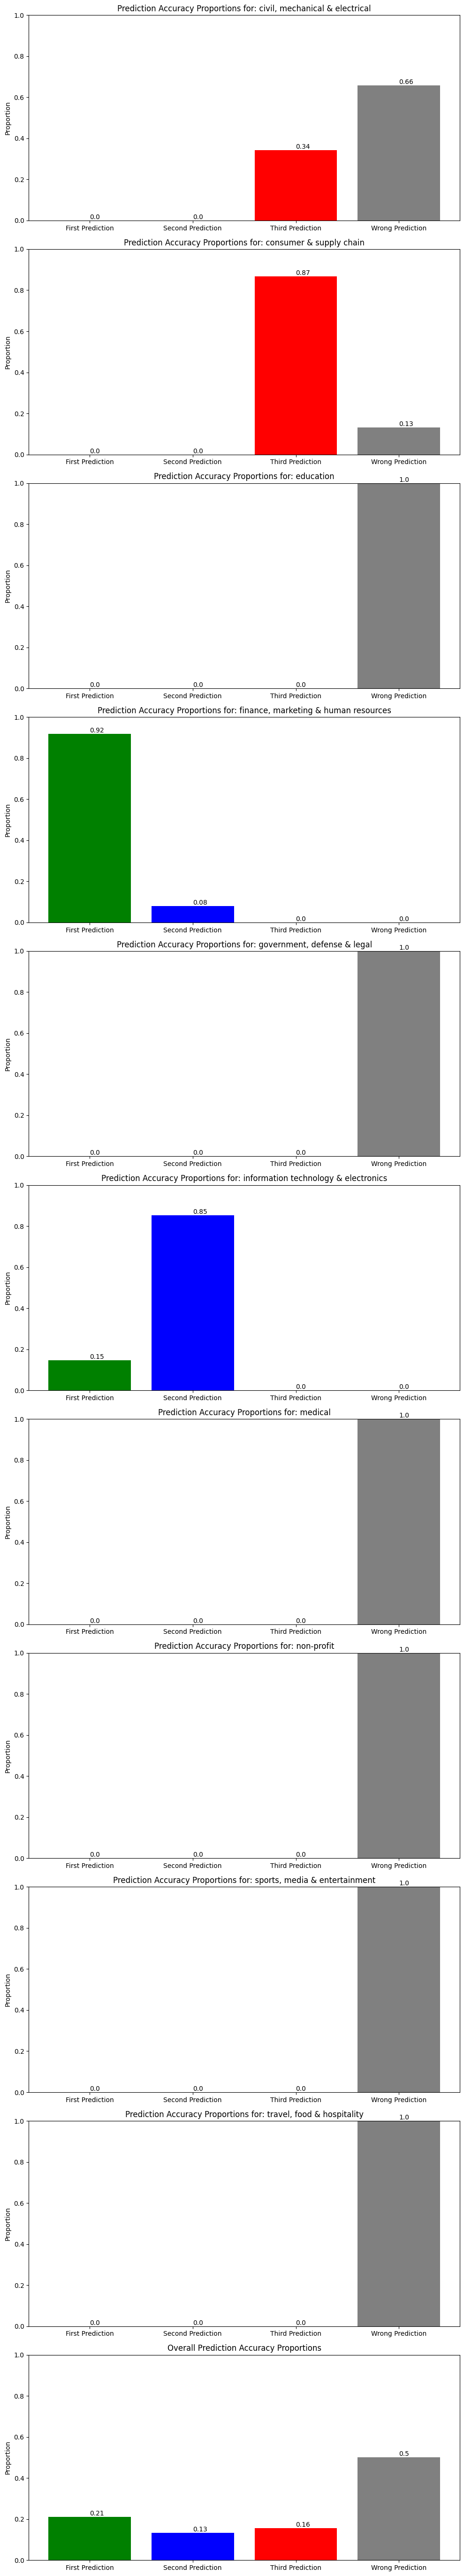

In [1]:
import glob
import pandas as pd
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import pandas as pd

directory= "/data/sxs7285/Porjects_code/sector_activity/data/data_csv2/"

linkedin = pd.read_csv(os.path.join(directory, "Linekdin_dataset_Finale.csv"))


def cumalative_freq(data,word_count):
    quantiles = data[word_count].quantile([0.15,0.25,0.5,0.75])
    total_samples = len(data[word_count])
    print(f"Total samples: {total_samples}")

    for quantile in quantiles.index:
        count_above = (data[word_count] > quantiles[quantile]).sum()
        print(f"Number of samples above the {quantile*100}% quantile ({quantiles[quantile]}): {count_above}")


cumalative_freq(linkedin,"content_word_count")
cumalative_freq(linkedin,"summary_word_count")





import pandas as pd

def filter_by_word_count_quantile(df, word_count_column, quantile_threshold):
    """
    Filters out samples from the DataFrame with word counts less than the specified quantile threshold.

    Parameters:
    - df: pandas DataFrame
    - word_count_column: str, name of the column containing word counts
    - quantile_threshold: float, quantile threshold (between 0 and 1)

    Returns:
    - filtered_df: pandas DataFrame, DataFrame with samples having word counts >= quantile threshold
    """
    # Calculate the quantile value
    quantile_value = df[word_count_column].quantile(quantile_threshold)
    
    # Filter the DataFrame
    filtered_df = df[df[word_count_column] >= quantile_value]
    
    return filtered_df

# Example usage:
# Assuming `linkedin` is your DataFrame with a column 'word_count'
# Filter out samples with word count less than the 0.25 quantile
filtered_linkedin = filter_by_word_count_quantile(linkedin, 'content_word_count', 0.15)

# filtered_linkedin = filtered_linkedin.sample(1000)
# Print the sizes of the original and filtered DataFrames
print(f"Original dataset size: {len(linkedin)}")
print(f"Filtered dataset size: {len(filtered_linkedin)}")



from sklearn.model_selection import train_test_split

class_column = 'label_coarse'
train_data_cv, test_data = train_test_split(filtered_linkedin, test_size=0.3, random_state=42, stratify=filtered_linkedin[class_column])
train_data, val_data = train_test_split(train_data_cv, test_size=0.2, random_state=42, stratify=train_data_cv[class_column])





import os
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import torch
from datasets import Dataset
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments, DataCollatorWithPadding
from transformers import EvalPrediction
from sklearn.metrics import accuracy_score

os.environ["WANDB_PROJECT"] = "PrivaSeer"  # name your W&B project
os.environ["WANDB_LOG_MODEL"] = "checkpoint"  # log all model checkpoints

if torch.cuda.is_available():
    device = torch.device('cuda')
    print("GPU is available")
else:
    device = torch.device('cpu')
    print("GPU not available, using CPU")



# Encode labels
label_encoder = LabelEncoder()
train_data['label_fine'] = train_data['label']
train_data['labels'] = label_encoder.fit_transform(train_data['label_coarse'])  # Rename to 'labels'

val_data['label_fine'] = val_data['label']
val_data['labels'] = label_encoder.fit_transform(val_data['label_coarse'])  # Rename to 'labels'

test_data['label_fine'] = test_data['label']
test_data['labels'] = label_encoder.fit_transform(test_data['label_coarse'])  # Rename to 'labels'






# Define the tokenizer and model
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=len(label_encoder.classes_))
model.to(device)

from transformers import Trainer, TrainingArguments, DataCollatorWithPadding



from peft import PeftModel, PeftConfig, get_peft_model, LoraConfig



peft_config = LoraConfig(task_type="SEQ_CLS",
                         r=128,
                         lora_alpha=512,
                         lora_dropout=0.6,
                         target_modules=["query", "key", "value"])




# Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples['extractive_summary'], truncation=True, padding=True)

# Convert pandas DataFrame to Hugging Face Dataset
# train_dataset = Dataset.from_pandas(train_data[['cleaned_summary', 'labels']])
# test_dataset = Dataset.from_pandas(test_data[['cleaned_summary', 'labels']])
# Convert pandas DataFrame to Hugging Face Dataset
train_dataset = Dataset.from_pandas(train_data[['extractive_summary', 'labels', 'label_fine']])
val_dataset = Dataset.from_pandas(val_data[['extractive_summary', 'labels', 'label_fine']])

test_dataset = Dataset.from_pandas(test_data[['extractive_summary', 'labels', 'label_fine']])


print("test_dataset",test_dataset)


# Apply tokenization
train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)

test_dataset = test_dataset.map(tokenize_function, batched=True)

print("test_dataset",test_dataset)


# Set the format for PyTorch
train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])
val_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])

test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])

print("test_dataset",test_dataset)

# Define a data collator
data_collator = DataCollatorWithPadding(tokenizer)

# Save evaluation results to a text file
output_dir = '/data/sxs7285/Porjects_code/sector_activity/classification_final/results/peft_roberta/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Define the training arguments
training_args = TrainingArguments(
    output_dir=os.path.join(output_dir, './results'),
    num_train_epochs=5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    evaluation_strategy='epoch',
    eval_steps=100,
    learning_rate=5e-6,
    save_strategy='epoch',
    logging_strategy="steps",
    logging_dir=os.path.join(output_dir, './logs'),
    logging_steps=10,
    load_best_model_at_end=True,
    weight_decay=0.6,
    report_to="wandb",
    metric_for_best_model="eval_loss",  # Use eval_loss to select the best model
    greater_is_better=False             # Lower loss is better

)
# Define a custom compute_metrics function
def compute_metrics(p: EvalPrediction):
    preds = np.argmax(p.predictions, axis=1)
    accuracy = (preds == p.label_ids).astype(np.float32).mean().item()
    precision = precision_score(p.label_ids, preds, average='weighted')
    recall = recall_score(p.label_ids, preds, average='weighted')
    f1 = f1_score(p.label_ids, preds, average='weighted')
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

from transformers import get_linear_schedule_with_warmup




# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    data_collator=data_collator,

)

# Start training
trainer.train()


# Evaluate the model
eval_result = trainer.evaluate()
print(eval_result)



with open(os.path.join(output_dir, 'evaluation_results.txt'), 'w') as f:
    for key, value in eval_result.items():
        f.write(f"{key}: {value}\n")

# Get predictions
predictions = trainer.predict(test_dataset)
preds = np.argmax(predictions.predictions, axis=1)
probs = predictions.predictions

print("pred", preds.shape, preds)
print("test_data['labels']", test_data['labels'].shape, test_data['labels'])


# Classification report
report = classification_report(test_data['labels'], preds, target_names=label_encoder.classes_)
print(report)

# Calculate per-class accuracy
def per_class_accuracy(y_true, y_pred, labels):
    class_accuracies = {}
    for label in labels:
        idx = y_true == label
        class_accuracies[label] = accuracy_score(y_true[idx], y_pred[idx])
    return class_accuracies

per_class_acc = per_class_accuracy(test_data['labels'], preds, np.unique(test_data['labels']))

# Convert per-class accuracy dictionary to a string for printing
per_class_acc_str = "\n".join([f"{label_encoder.classes_[label]}: {accuracy:.2f}" for label, accuracy in per_class_acc.items()])

# Print classification report with per-class accuracy
print(report)
print("Per-class accuracy:\n", per_class_acc_str)



# Save per-class accuracy to a separate text file
with open(os.path.join(output_dir, 'per_class_accuracy.txt'), 'w') as f:
    f.write("Per-class accuracy:\n")
    f.write(per_class_acc_str)

'''
Error Analysis
'''
# Identify incorrect predictions
incorrect_indices = np.where(test_data['labels'] != preds)[0]

# Extract the corresponding rows from the original dataset
incorrect_preds = test_data.iloc[incorrect_indices].copy()

# Add actual and predicted labels
incorrect_preds['actual_label'] = label_encoder.inverse_transform(test_data['labels'].iloc[incorrect_indices])
incorrect_preds['predicted_label'] = label_encoder.inverse_transform(preds[incorrect_indices])
incorrect_preds['fine_label'] = test_data['label'].iloc[incorrect_indices]

# Add top three predicted labels: it tells you the positions of the elements in the original array if they were sorted in ascending order.
top_3_preds = np.argsort(probs, axis=1)[:, -3:]  # Get the indices of the top three predictions

import torch.nn.functional as F

# Apply softmax to the predictions
softmax_predictions = F.softmax(torch.tensor(predictions.predictions), dim=1)

# Get softmax of the first three samples
top_3_prob = np.sort(softmax_predictions.cpu().numpy(),axis =1)[:,-3:]

# Extract the top three predictions for incorrect indices
incorrect_preds['predicted_label'] = label_encoder.inverse_transform(top_3_preds[incorrect_indices][:, 2])
incorrect_preds['predicted_label2'] = label_encoder.inverse_transform(top_3_preds[incorrect_indices][:, 1])
incorrect_preds['predicted_label3'] = label_encoder.inverse_transform(top_3_preds[incorrect_indices][:, 0])

incorrect_preds['predicted_prob'] = top_3_prob[incorrect_indices][:, 2]
incorrect_preds['predicted_prob2'] = top_3_prob[incorrect_indices][:, 1]
incorrect_preds['predicted_prob3'] = top_3_prob[incorrect_indices][:, 0]



# Display the first few rows
print(incorrect_preds.head())

# Save incorrect predictions to a CSV file
incorrect_preds.to_csv(os.path.join(output_dir,"error_result.csv"), index=False)


# Identify predictions where the true label is not among the top three predictions
incorrect_top_3_indices = [i for i in range(len(test_data)) if test_data['labels'].iloc[i] not in top_3_preds[i]]

# Extract the corresponding rows from the original dataset
incorrect_top_3_preds = test_data.iloc[incorrect_top_3_indices].copy()

# Add actual and predicted labels
incorrect_top_3_preds['actual_label'] = label_encoder.inverse_transform(test_data['labels'].iloc[incorrect_top_3_indices])
incorrect_top_3_preds['predicted_label'] = label_encoder.inverse_transform(top_3_preds[incorrect_top_3_indices][:, 2])
incorrect_top_3_preds['predicted_label2'] = label_encoder.inverse_transform(top_3_preds[incorrect_top_3_indices][:, 1])
incorrect_top_3_preds['predicted_label3'] = label_encoder.inverse_transform(top_3_preds[incorrect_top_3_indices][:, 0])

# Save incorrect predictions to a CSV file
incorrect_top_3_preds.to_csv(os.path.join(output_dir, "incorrect_top_3_preds.csv"), index=False)

'''
Error Analysis
'''


# Save classification report to a text file
with open(os.path.join(output_dir, 'classification_report.txt'), 'w') as f:
    f.write(report)

# Calculate top-N accuracy
def top_n_accuracy(y_true, y_pred_probs, n=1):
    top_n_preds = np.argsort(y_pred_probs, axis=1)[:, -n:]
    matches = np.any(top_n_preds == np.array(y_true).reshape(-1, 1), axis=1)
    return np.mean(matches)

# Evaluate and print top-N accuracies
top1_acc = top_n_accuracy(test_data['labels'], probs, n=1)
top2_acc = top_n_accuracy(test_data['labels'], probs, n=2)
top3_acc = top_n_accuracy(test_data['labels'], probs, n=3)

print(f"Top-1 Accuracy: {top1_acc:.2f}")
print(f"Top-2 Accuracy: {top2_acc:.2f}")
print(f"Top-3 Accuracy: {top3_acc:.2f}")

# Save top-N accuracies to a text file
with open(os.path.join(output_dir, 'top_n_accuracies.txt'), 'w') as f:
    f.write(f"Top-1 Accuracy: {top1_acc:.2f}\n")
    f.write(f"Top-2 Accuracy: {top2_acc:.2f}\n")
    f.write(f"Top-3 Accuracy: {top3_acc:.2f}\n")

# Generate confusion matrix for top-1 accuracy
conf_matrix_top1 = confusion_matrix(test_data['labels'], preds)
print("Confusion Matrix (Top-1, RoBERTa):\n", conf_matrix_top1)

# Save confusion matrix to a text file
with open(os.path.join(output_dir, 'confusion_matrix.txt'), 'w') as f:
    f.write("Confusion Matrix (Top-1, RoBERTa):\n")
    f.write(np.array2string(conf_matrix_top1))

# Normalize the confusion matrix row-wise
conf_matrix_normalized = conf_matrix_top1 / conf_matrix_top1.sum(axis=1, keepdims=True)

# Rank predictions for each class (highest to lowest)
ranked_predictions = np.argsort(-conf_matrix_normalized, axis=1)

# Translate ranked label indices back to class names
ranked_class_names = np.array(label_encoder.classes_)[ranked_predictions]

# Display the ranked predictions for each true class
ranked_class_names_dict = {label_encoder.classes_[i]: ranked_class_names[i].tolist() for i in range(len(label_encoder.classes_))}
print(ranked_class_names_dict)

# Save ranked class names to a text file
with open(os.path.join(output_dir, 'ranked_class_names.txt'), 'w') as f:
    for class_name, ranks in ranked_class_names_dict.items():
        f.write(f"{class_name}: {ranks}\n")

top_3_preds = np.argsort(probs, axis=1)[:, -3:]  # Get the indices of the top three predictions

# Initialize counters for each position
first_pred_correct = np.zeros(len(label_encoder.classes_))
second_pred_correct = np.zeros(len(label_encoder.classes_))
third_pred_correct = np.zeros(len(label_encoder.classes_))
wrong_preds = np.zeros(len(label_encoder.classes_))
total_counts = np.zeros(len(label_encoder.classes_))

for true, preds in zip(test_data['labels'], top_3_preds):
    total_counts[true] += 1
    if preds[2] == true:
        first_pred_correct[true] += 1
    if preds[1] == true:
        second_pred_correct[true] += 1
    if preds[0] == true:
        third_pred_correct[true] += 1
    if true not in preds:
        wrong_preds[true] += 1

# Calculate proportions for each class
first_pred_proportions = first_pred_correct / total_counts
second_pred_proportions = second_pred_correct / total_counts
third_pred_proportions = third_pred_correct / total_counts
wrong_pred_proportions = wrong_preds / total_counts

# Calculate total proportions across all classes
total_first = np.sum(first_pred_correct) / np.sum(total_counts)
total_second = np.sum(second_pred_correct) / np.sum(total_counts)
total_third = np.sum(third_pred_correct) / np.sum(total_counts)
total_wrong = np.sum(wrong_preds) / np.sum(total_counts)

# Visualization for each class
fig, axes = plt.subplots(len(label_encoder.classes_) + 1, 1, figsize=(10, 5 * (len(label_encoder.classes_) + 1)))  # +1 for the total plot
for i, class_name in enumerate(label_encoder.classes_):
    bars = axes[i].bar(['First Prediction', 'Second Prediction', 'Third Prediction', 'Wrong Prediction'],
                       [first_pred_proportions[i], second_pred_proportions[i], third_pred_proportions[i], wrong_pred_proportions[i]],
                       color=['green', 'blue', 'red', 'grey'])
    axes[i].set_title(f'Prediction Accuracy Proportions for: {class_name}')
    axes[i].set_ylabel('Proportion')
    axes[i].set_ylim(0, 1)
    for bar in bars:
        yval = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')  # Label the bars

    # Save individual class plots
    fig_class_path = os.path.join(output_dir, f'prediction_accuracy_proportions_{class_name}.png')
    fig.savefig(fig_class_path)

# Overall visualization
bars = axes[-1].bar(['First Prediction', 'Second Prediction', 'Third Prediction', 'Wrong Prediction'],
                    [total_first, total_second, total_third, total_wrong],
                    color=['green', 'blue', 'red', 'grey'])
axes[-1].set_title('Overall Prediction Accuracy Proportions')
axes[-1].set_ylabel('Proportion')
axes[-1].set_ylim(0, 1)
for bar in bars:
    yval = bar.get_height()
    axes[-1].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')  # Label the bars

# Save overall plot
fig_overall_path = os.path.join(output_dir, 'overall_prediction_accuracy_proportions.png')
fig.savefig(fig_overall_path)

plt.tight_layout()
plt.show()

# Save the overall figure
fig.savefig(os.path.join(output_dir, 'overall_prediction_accuracy_proportions.png'))









